# <span style="background-color:#005e81; padding:5px; border-radius:5px;">**contracts_2009_2024**</span>

In [118]:
# !pip install scipy
# !pip install scikit-learn
# !pip install umap-learn
# !pip install statsmodels
# !pip install scikit-posthocs
# !pip install pyarrow

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import OrderedDict
from datetime import date
import ast
from itertools import zip_longest
from scipy.stats import kstest, norm
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import math
from sklearn.manifold import TSNE
import umap
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy import stats
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as sps
import scikit_posthocs as sp

In [120]:
contracts_2009_2024 = pd.read_parquet("C:/Users/beatr/Desktop/NOVA IMS/Bolsa de Investigação/RISKGUARD/contracts_2009_2024.parquet")
contracts_2009_2024

,id,contract_id,contestants,contracted,contract_type,documents,invitees,centralized_procedure,procedure_type,contracting_agency,...,cpvs,execution_deadline,execution_location,initial_price,final_price,signing_date,environmental_criteria,material_criteria,causes_deadline_change,causes_price_change
0,1,94221,None,"[{'description': 'CESPA Portugal, S.A.', 'nif'...",Aquisição de serviços,None,None,None,Ajuste Direto Regime Geral,"[{'description': 'Município de Setúbal', 'nif'...",...,50000000-5,15,"[{'country': 'Portugal', 'district': 'Setubal'...",9613.74,NaN,2009-10-15,False,False,None,None
1,2,74464,None,"[{'description': 'Salemo & Merca, Lda.', 'nif'...",Aquisição de bens móveis,None,None,None,Ajuste Direto Regime Geral,"[{'description': 'Lagos em Forma, Gestão Despo...",...,44212310-5,60,"[{'country': 'Portugal', 'district': 'Faro', '...",6457.20,6457.2,2009-06-23,False,False,None,None
2,3,123257,None,"[{'description': 'Jorge, Vitor, Neto, Fernande...",Aquisição de serviços,None,None,None,Ajuste Direto Regime Geral,"[{'description': 'Município de Resende', 'nif'...",...,79212500-8,730,"[{'country': 'Portugal', 'district': 'Viseu', ...",10000.00,10000.0,2009-12-15,False,False,None,None
3,4,132120,None,[{'description': 'Instituto Politécnico de Lei...,Aquisição de serviços,None,None,None,Ajuste Direto Regime Geral,[{'description': 'Instituto da Conservação da ...,...,92222000-3,40,"[{'country': 'Portugal', 'district': 'Santarem...",5600.00,NaN,2009-11-09,False,False,None,None
4,5,66521,None,[{'description': 'LGT TELECOMUNICAÇÕES E ELECT...,Aquisição de bens móveis,None,None,None,Ajuste Direto Regime Geral,"[{'description': 'Estado Maior do Exército', '...",...,30231000-7,45,"[{'country': 'Portugal', 'district': 'Santarem...",10325.68,NaN,2009-07-02,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931285,204456,11097971,None,[{'description': 'Mind Software Multimédia Ind...,Aquisição de serviços,"[{'description': 'Contrato_152_2024.pdf', 'id'...",None,False,Ajuste Direto Regime Geral,[{'description': 'MUNICÍPIO DA MARINHA GRANDE'...,...,72267100-0,1095,"[{'country': 'Portugal', 'district': 'Leiria',...",59535.00,NaN,2024-12-13,False,False,None,None
1931286,204461,10813424,[{'description': 'ECOAMBIENTE - SERVIÇOS E MEI...,[{'description': 'JUSTACOLINA- SERVIÇOS DE SIL...,Aquisição de serviços,[{'description': 'CP-2024-06_DOP - contrato_Lo...,None,False,Concurso público,[{'description': 'AdRA - Águas da Região de Av...,...,77314000-4,630,"[{'country': 'Portugal', 'district': 'Aveiro',...",199000.00,NaN,2024-07-09,True,False,None,None
1931287,204474,10813480,"[{'description': 'Dolce Far Niente Lda', 'nif'...",[{'description': 'Dolce Far Niente Turismo e E...,Aquisição de serviços,"[{'description': 'contrato 53_Ocultado.pdf', '...",None,False,Ajuste Direto Regime Geral,"[{'description': 'Município de Sabrosa', 'nif'...",...,92310000-7,1,"[{'country': 'Portugal', 'district': 'Vila Rea...",10250.00,10250.0,2024-07-08,False,False,None,None
1931288,204480,10813483,None,[{'description': 'Teva Pharma - Produtos Farma...,Aquisição de bens móveis,None,None,False,Ajuste Direto Regime Geral,[{'description': 'Unidade Local de Saúde de Sa...,...,33600000-6,30,"[{'country': 'Portugal', 'district': 'Porto', ...",188370.00,NaN,2024-03-21,False,True,None,None


## <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Preprocessing**</span> <a id='Data-Types'></a> 

In [121]:
contracts_2009_2024["procedure_type"].value_counts(dropna=False)

procedure_type
Ajuste Direto Regime Geral                                                        1284302
Consulta Prévia                                                                    249122
Concurso público                                                                   197182
Ao abrigo de acordo-quadro (art.º 259.º)                                           155463
Ao abrigo de acordo-quadro (art.º 258.º)                                            36836
Concurso limitado por prévia qualificação                                            3495
Contratação excluída II                                                              2765
Consulta Prévia Simplificada                                                         1202
Setores especiais – isenção parte II                                                  710
Procedimento de negociação                                                             94
Concurso público simplificado                                                        

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**procedure_type**</span> <a id='Data-Types'></a> 

Vamos só considerar `Concurso Público`:

In [122]:
concursos_publicos = contracts_2009_2024[contracts_2009_2024["procedure_type"] == 'Concurso público']
concursos_publicos

,id,contract_id,contestants,contracted,contract_type,documents,invitees,centralized_procedure,procedure_type,contracting_agency,...,cpvs,execution_deadline,execution_location,initial_price,final_price,signing_date,environmental_criteria,material_criteria,causes_deadline_change,causes_price_change
21,72,113748,None,[{'description': 'MECH - Engenheiros Associado...,Aquisição de serviços,None,None,None,Concurso público,[{'description': 'Instituto da Habitação e da ...,...,71322000-1,75,"[{'country': 'Portugal', 'district': 'Setubal'...",25000.00,NaN,2009-12-04,False,False,None,None
165,68,83773,None,[{'description': 'Gertal - Companhia de Restau...,Aquisição de serviços,None,None,None,Concurso público,[{'description': 'Município de Vila Pouca de A...,...,55524000-9,300,"[{'country': 'Portugal', 'district': 'Vila Rea...",140077.08,NaN,2009-09-11,False,False,None,None
276,1811,617382,None,"[{'description': 'Gonçalves & Cachadinha, SA',...",Empreitadas de obras públicas,None,None,None,Concurso público,[{'description': 'Município de Arcos de Valdev...,...,45233251-3,200,"[{'country': 'Portugal', 'district': 'Viana do...",699097.05,706538.62,2009-07-17,False,False,Problemas de logística e de tesouraria do adju...,"As alterações no valor de obra, resultam do fa..."
432,172,131965,None,[{'description': 'FCTUNL - Faculdade Ciências ...,Aquisição de serviços,None,None,None,Concurso público,[{'description': 'Agência Portuguesa do Ambien...,...,90710000-7,365,"[{'country': 'Portugal', 'district': 'Lisboa',...",133000.00,NaN,2009-07-30,False,False,None,None
531,195,87178,None,[{'description': 'Hobbyvida-Serviços Desportiv...,Aquisição de serviços,None,None,None,Concurso público,"[{'description': 'Município de Abrantes', 'nif...",...,80000000-4,174,"[{'country': 'Portugal', 'district': 'Santarem...",53935.00,51922.50,2009-09-11,False,False,None,Estava prevista a frequência de todos os aluno...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931274,204444,11088869,"[{'description': 'Carl Zeiss Iberia S.L.', 'ni...","[{'description': 'Carl Zeiss Iberia S.L.', 'ni...",Aquisição de bens móveis,[{'description': 'BaseGov_Contrato_CP_02_2024_...,None,False,Concurso público,[{'description': 'UNL - Faculdade de Ciências ...,...,38515200-0,121,"[{'country': 'Portugal', 'district': 'Lisboa',...",510000.00,NaN,2024-12-10,False,False,None,None
1931281,204436,11088891,[{'description': 'Servilimpe Limpezas Técnicas...,"[{'description': 'Fine Facility Services', 'ni...",Aquisição de serviços,[{'description': '3024012666 20241210 - CONTRA...,None,True,Concurso público,[{'description': 'Ministério da Defesa Naciona...,...,90910000-9,912,"[{'country': 'Portugal', 'district': 'Setubal'...",6182.64,NaN,2024-05-29,False,False,None,None
1931283,204443,11088904,"[{'description': 'Exemplus Internacional Ldª',...",[{'description': 'Multitendas-Comércio e Alugu...,Locação de bens móveis,"[{'description': 'Multitendas Expurgado.pdf', ...",None,False,Concurso público,"[{'description': 'Município de Braga', 'nif': ...",...,39300000-5,182,"[{'country': 'Portugal', 'district': 'Braga', ...",529612.45,NaN,2024-12-11,False,False,None,None
1931286,204461,10813424,[{'description': 'ECOAMBIENTE - SERVIÇOS E MEI...,[{'description': 'JUSTACOLINA- SERVIÇOS DE SIL...,Aquisição de serviços,[{'description': 'CP-2024-06_DOP - contrato_Lo...,None,False,Concurso público,[{'description': 'AdRA - Águas da Região de Av...,...,77314000-4,630,"[{'country': 'Portugal', 'district': 'Aveiro',...",199000.00,NaN,2024-07-09,True,False,None,None


##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Irrelevant columns**</span> <a id='Data-Types'></a> 

We will drop the columns:
- `invitees`, because its related to **Consulta Prévia**;
- `procedure_type` because we are only analysing **Concurso Público**;
- `environmental_criteria`, `material_criteria`, `documents`, `causes_deadline_change`, `causes_price_change`, `id` and `centralized_procedure` are not relevant for collusion or bid-rigging detection;
- `close_date` have 82% of missing values;
- `publication_date` because we will focus on the **signing_date**.

In [123]:
concursos_publicos.drop(columns=["invitees","procedure_type","environmental_criteria", 
                                 "material_criteria","documents","causes_deadline_change", 
                                 "causes_price_change","id","close_date", "publication_date",
                                 "centralized_procedure"], inplace=True)
concursos_publicos.shape

C:\Users\beatr\AppData\Local\Temp\ipykernel_29828\4010961327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concursos_publicos.drop(columns=["invitees","procedure_type","environmental_criteria",


(197182, 11)

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**contestants**</span> <a id='Data-Types'></a> 

Vamos eliminar as linhas que têm missing values na coluna `contestants`:

In [124]:
pct_nan = concursos_publicos["contestants"].isna().mean() * 100
print(f"% NaN/None: {pct_nan:.2f}%")

% NaN/None: 25.83%


In [125]:
concursos_publicos = concursos_publicos[concursos_publicos["contestants"].notna()]
concursos_publicos

,contract_id,contestants,contracted,contract_type,contracting_agency,cpvs,execution_deadline,execution_location,initial_price,final_price,signing_date
73146,875874,"[{'description': 'Dimor Lusitana,Lda', 'nif': ...",[{'description': 'Medicinália Cormédica-Comerc...,Aquisição de bens móveis,[{'description': 'Centro Hospitalar de Torres ...,33171000-9,240,"[{'country': 'Portugal', 'district': 'Lisboa',...",15450.00,NaN,2010-05-12
73764,148916,[{'description': 'Tomás de Oliveira Empreiteir...,[{'description': 'MRG - ENGENHARIA E CONSTRUÇÃ...,Empreitadas de obras públicas,[{'description': 'VALORLIS Valorização e Trata...,45000000-7,150,"[{'country': 'Portugal', 'district': 'Leiria',...",1794202.51,NaN,2010-07-30
78646,1076289,"[{'description': 'TV CABO LISBOA, S.A.', 'nif'...",[{'description': 'PT PRIME - Soluções Empresar...,Aquisição de serviços,[{'description': 'Santa Casa da Misericórdia d...,50000000-5,365,"[{'country': 'Portugal', 'district': 'Lisboa',...",9779231.25,NaN,2010-11-25
124563,136321,[{'description': 'Saniambiente Serviços Profis...,"[{'description': 'Euromex - Facility Services,...",Aquisição de serviços,"[{'description': 'Município de Torres Vedras',...",90911200-8,365,"[{'country': 'Portugal', 'district': 'Lisboa',...",103555.17,NaN,2010-08-16
125322,600796,[{'description': 'De Almeida Ribeiro Empreendi...,"[{'description': 'Opção - Sociedade Hoteleira,...",Aquisição de serviços,"[{'description': 'Municipio de Oeiras', 'nif':...",55520000-1,365,"[{'country': 'Portugal', 'district': 'Lisboa',...",200000.00,80655.0,2010-03-25
...,...,...,...,...,...,...,...,...,...,...,...
1931274,11088869,"[{'description': 'Carl Zeiss Iberia S.L.', 'ni...","[{'description': 'Carl Zeiss Iberia S.L.', 'ni...",Aquisição de bens móveis,[{'description': 'UNL - Faculdade de Ciências ...,38515200-0,121,"[{'country': 'Portugal', 'district': 'Lisboa',...",510000.00,NaN,2024-12-10
1931281,11088891,[{'description': 'Servilimpe Limpezas Técnicas...,"[{'description': 'Fine Facility Services', 'ni...",Aquisição de serviços,[{'description': 'Ministério da Defesa Naciona...,90910000-9,912,"[{'country': 'Portugal', 'district': 'Setubal'...",6182.64,NaN,2024-05-29
1931283,11088904,"[{'description': 'Exemplus Internacional Ldª',...",[{'description': 'Multitendas-Comércio e Alugu...,Locação de bens móveis,"[{'description': 'Município de Braga', 'nif': ...",39300000-5,182,"[{'country': 'Portugal', 'district': 'Braga', ...",529612.45,NaN,2024-12-11
1931286,10813424,[{'description': 'ECOAMBIENTE - SERVIÇOS E MEI...,[{'description': 'JUSTACOLINA- SERVIÇOS DE SIL...,Aquisição de serviços,[{'description': 'AdRA - Águas da Região de Av...,77314000-4,630,"[{'country': 'Portugal', 'district': 'Aveiro',...",199000.00,NaN,2024-07-09


Criamos uma coluna com o número de contestants:

In [126]:
concursos_publicos = concursos_publicos.copy()  # evita SettingWithCopy

concursos_publicos["number_of_contestants"] = concursos_publicos["contestants"].apply(lambda a: len(a))

Now, we will remove the cases that only have 1 contestant, because they are not relevant to study collusion.

In [127]:
concursos_publicos = concursos_publicos[concursos_publicos["number_of_contestants"] > 1].copy()
concursos_publicos

,contract_id,contestants,contracted,contract_type,contracting_agency,cpvs,execution_deadline,execution_location,initial_price,final_price,signing_date,number_of_contestants
73146,875874,"[{'description': 'Dimor Lusitana,Lda', 'nif': ...",[{'description': 'Medicinália Cormédica-Comerc...,Aquisição de bens móveis,[{'description': 'Centro Hospitalar de Torres ...,33171000-9,240,"[{'country': 'Portugal', 'district': 'Lisboa',...",15450.00,NaN,2010-05-12,25
73764,148916,[{'description': 'Tomás de Oliveira Empreiteir...,[{'description': 'MRG - ENGENHARIA E CONSTRUÇÃ...,Empreitadas de obras públicas,[{'description': 'VALORLIS Valorização e Trata...,45000000-7,150,"[{'country': 'Portugal', 'district': 'Leiria',...",1794202.51,NaN,2010-07-30,12
78646,1076289,"[{'description': 'TV CABO LISBOA, S.A.', 'nif'...",[{'description': 'PT PRIME - Soluções Empresar...,Aquisição de serviços,[{'description': 'Santa Casa da Misericórdia d...,50000000-5,365,"[{'country': 'Portugal', 'district': 'Lisboa',...",9779231.25,NaN,2010-11-25,6
124563,136321,[{'description': 'Saniambiente Serviços Profis...,"[{'description': 'Euromex - Facility Services,...",Aquisição de serviços,"[{'description': 'Município de Torres Vedras',...",90911200-8,365,"[{'country': 'Portugal', 'district': 'Lisboa',...",103555.17,NaN,2010-08-16,3
125322,600796,[{'description': 'De Almeida Ribeiro Empreendi...,"[{'description': 'Opção - Sociedade Hoteleira,...",Aquisição de serviços,"[{'description': 'Municipio de Oeiras', 'nif':...",55520000-1,365,"[{'country': 'Portugal', 'district': 'Lisboa',...",200000.00,80655.0,2010-03-25,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1931273,11088884,"[{'description': 'Socodefil Lda', 'nif': '5007...","[{'description': 'Grandatlas Construções SA', ...",Empreitadas de obras públicas,[{'description': 'Freguesia de Avenidas Novas'...,45453100-8,180,"[{'country': 'Portugal', 'district': 'Lisboa',...",403966.10,NaN,2024-10-30,3
1931281,11088891,[{'description': 'Servilimpe Limpezas Técnicas...,"[{'description': 'Fine Facility Services', 'ni...",Aquisição de serviços,[{'description': 'Ministério da Defesa Naciona...,90910000-9,912,"[{'country': 'Portugal', 'district': 'Setubal'...",6182.64,NaN,2024-05-29,16
1931283,11088904,"[{'description': 'Exemplus Internacional Ldª',...",[{'description': 'Multitendas-Comércio e Alugu...,Locação de bens móveis,"[{'description': 'Município de Braga', 'nif': ...",39300000-5,182,"[{'country': 'Portugal', 'district': 'Braga', ...",529612.45,NaN,2024-12-11,4
1931286,10813424,[{'description': 'ECOAMBIENTE - SERVIÇOS E MEI...,[{'description': 'JUSTACOLINA- SERVIÇOS DE SIL...,Aquisição de serviços,[{'description': 'AdRA - Águas da Região de Av...,77314000-4,630,"[{'country': 'Portugal', 'district': 'Aveiro',...",199000.00,NaN,2024-07-09,17


In [128]:
concursos_publicos.drop(columns=['number_of_contestants'], inplace=True)

Agora vamos verificar na coluna dos contestants, se todas as entries estão completas, ou seja, se têm description e nif:

In [129]:
def all_desc_and_nif(cell):
    # transformar dict isolado em lista
    if isinstance(cell, dict):
        cell = [cell]
    # se não for lista/array, considerar inválido
    if not isinstance(cell, (list, np.ndarray)):
        return False
    
    for d in cell:
        if not isinstance(d, dict):
            return False
        
        desc = d.get('description')
        nif  = d.get('nif')

        # têm de existir e não estar vazios
        if not desc or pd.isna(desc):
            return False
        if not nif or pd.isna(nif) or str(nif).strip() == "":
            return False
    return True

# máscara: linhas em que TODOS os contestants têm description e nif
mask_ok = concursos_publicos["contestants"].apply(all_desc_and_nif)

print("Linhas OK:", mask_ok.sum())
print("Linhas com problemas:", (~mask_ok).sum())

# ver os casos com problemas
problematic = concursos_publicos.loc[~mask_ok, ["contract_id", "contestants"]]
problematic

Linhas OK: 131826
Linhas com problemas: 918


,contract_id,contestants
1726811,11021616,"[{'description': 'REDEMAIOR ENGENHARIA LDA', '..."
1727163,10778987,"[{'description': 'BACELAR & IRMÃO,SA', 'nif': ..."
1727303,11011877,"[{'description': 'Táxis António José Jacinto',..."
1727661,10974879,"[{'description': 'Táxis Salvado & Ramos Lda.',..."
1728106,10827040,"[{'description': 'VESTEHEROIS INNOVATION LDA',..."
...,...,...
1929865,10473924,[{'description': 'Patrícia Daniela Ferreira Pe...
1930147,10898883,"[{'description': 'Vasco Miguel tavares', 'nif'..."
1930190,10518886,"[{'description': 'Berenice Gomes Vila', 'nif':..."
1930254,10518935,[{'description': 'Sofia Alexandra Silva Jesus ...


Existe, 918 casos em que está em falta um nif ou uma description, por isso vamos eliminar estes casos:

In [130]:
# manter só os casos em que todos os contestants têm description e nif
concursos_publicos = concursos_publicos.loc[mask_ok].copy()

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**contracted**</span> <a id='Data-Types'></a> 

In [131]:
counts = concursos_publicos["contracted"].apply(lambda x: len(x) if isinstance(x, (list, np.ndarray)) else 0)
counts.value_counts().sort_index()

contracted
1     129347
2       1508
3        376
4        178
5        150
6         70
7         47
8         32
9         20
10        18
11        14
12        13
13        14
14        11
15         2
17         2
18         4
19         2
20        10
23         1
24         1
26         2
27         1
29         2
64         1
Name: count, dtype: int64

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**contracting_agency**</span> <a id='Data-Types'></a> 

In [132]:
counts = concursos_publicos["contracting_agency"].apply(lambda x: len(x) if isinstance(x, (list, np.ndarray)) else 0)
counts.value_counts().sort_index()

contracting_agency
1     131752
2         54
3          3
4          1
5          6
6          1
7          1
9          1
11         1
12         1
16         1
17         2
30         1
37         1
Name: count, dtype: int64

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**initial_price and final_price**</span> <a id='Data-Types'></a> 

Now we will merge the columns `initial_price` and `final_price` into a column named `price` that representes the final adjudicated value (prefer final_price when available, otherwise fall back to initial_price):

In [133]:
# Merge initial_price and final_price into one column
concursos_publicos["price"] = concursos_publicos["final_price"].fillna(concursos_publicos["initial_price"])

# Drop the old columns if you don't need them anymore
concursos_publicos.drop(columns=["initial_price", "final_price"], inplace=True)

Now we will eliminate the rows that have **negatice prices**:

In [134]:
# Remove lines with price negative values
concursos_publicos = concursos_publicos[concursos_publicos['price'] > 0]
concursos_publicos.shape

(130136, 10)

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**execution_deadline**</span> <a id='Data-Types'></a> 

Agora vamos analisar a coluna `execution_deadline`:

In [135]:
concursos_publicos['execution_deadline'].max()

194667

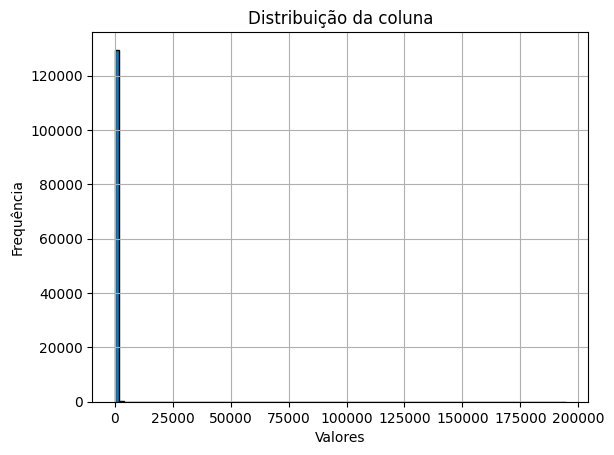

In [136]:
concursos_publicos['execution_deadline'].hist(bins=100, edgecolor='black')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Distribuição da coluna")
plt.show()

Depois de analisar a sua distribuição, concluímos que existem casos de execution_deadline demasiado elevados, vamos redifinir um valor máximo de 6000 dias (aproximadamente 16 anos) e excluir os valores que estão acima desse limite.

In [137]:
concursos_publicos = concursos_publicos[concursos_publicos["execution_deadline"] < 6000]

In [138]:
concursos_publicos.shape

(130021, 10)

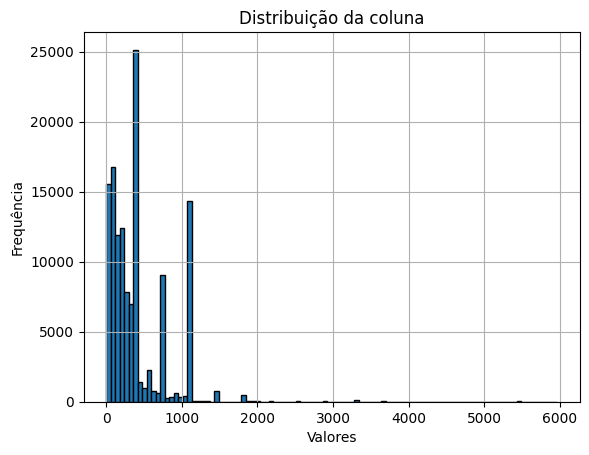

In [139]:
concursos_publicos['execution_deadline'].hist(bins=100, edgecolor='black')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Distribuição da coluna")
plt.show()

In [140]:
concursos_publicos.drop(columns=["execution_deadline"], inplace=True)

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**assembling contestants_name and contestants_nif**</span> <a id='Data-Types'></a> 

In [141]:
def get_contestants_names(cell):
    if isinstance(cell, dict): cell = [cell]
    if isinstance(cell, (list, np.ndarray)):
        vals = [d.get('description') for d in cell if isinstance(d, dict) and d.get('description')]
        return vals  
    return []

def get_contestants_nifs(cell):
    if isinstance(cell, dict): cell = [cell]
    if isinstance(cell, (list, np.ndarray)):
        vals = [str(d.get('nif')) for d in cell if isinstance(d, dict) and d.get('nif') is not None]
        return vals
    return []

In [142]:
concursos_publicos.loc[:, 'contestants_name'] = concursos_publicos['contestants'].apply(get_contestants_names)
concursos_publicos.loc[:, 'contestants_nif']  = concursos_publicos['contestants'].apply(get_contestants_nifs)

Now we will check if all the contestants_nifs are valid and remove invalid contestants_nifs:

In [143]:
# 9 digits, starts with 5-9, and exclude 999999999
pt_nif = re.compile(r'^(?!999999999)[5-9]\d{8}$')

def to_seq(x):
    if isinstance(x, np.ndarray): return x.tolist()
    if isinstance(x, list):       return x
    if pd.isna(x) or x is None:   return []
    return [x]

def all_nifs_valid(nifs):
    seq = to_seq(nifs)
    if not seq:           # para excluir linhas sem NIFs
        return False
    for v in seq:
        s = str(v).strip()
        if not pt_nif.fullmatch(s):
            return False
    return True

# máscara: todos os NIFs da célula são válidos
mask_all_valid = concursos_publicos["contestants_nif"].apply(all_nifs_valid)

print("Linhas com todos os NIFs válidos:", int(mask_all_valid.sum()))
print("Total de linhas:", len(concursos_publicos))

# manter só essas linhas
concursos_publicos = concursos_publicos.loc[mask_all_valid].copy()

Linhas com todos os NIFs válidos: 119316
Total de linhas: 130021


In [144]:
concursos_publicos.drop(columns=["contestants"], inplace=True)

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**assembling contracted_name and contracted_nif**</span> <a id='Data-Types'></a> 

In [145]:
def get_contracted_name(cell):
    if isinstance(cell, (list, np.ndarray)) and len(cell) > 0 and isinstance(cell[0], dict):
        return cell[0].get('description')
    return None

def get_contracted_nif(cell):
    if isinstance(cell, (list, np.ndarray)) and len(cell) > 0 and isinstance(cell[0], dict):
        return cell[0].get('nif')
    return None

In [146]:
concursos_publicos.loc[:, 'contracted_name'] = concursos_publicos['contracted'].apply(get_contracted_name)
concursos_publicos.loc[:, 'contracted_nif']  = concursos_publicos['contracted'].apply(get_contracted_nif)

Now we will check if all the contracted_nifs are valid:

In [147]:
# 9 digits, starts with 5-9, and exclude 999999999
pt_nif = re.compile(r'^(?!999999999)[5-9]\d{8}$')

s = concursos_publicos['contracted_nif'].astype(str).str.strip()
mask_valid = s.str.fullmatch(pt_nif)

num_valid = mask_valid.sum()
total_non_null = concursos_publicos['contracted_nif'].notna().sum()
pct_valid = (num_valid / total_non_null * 100) if total_non_null else 0

print(f"Valid Portuguese NIFs: {num_valid}")
print(f"Out of {total_non_null} non-null entries → {pct_valid:.1f}% valid")

Valid Portuguese NIFs: 119241
Out of 119316 non-null entries → 99.9% valid


In [148]:
# Drop das linhas inválidas
invalid_idx = concursos_publicos.index[~mask_valid]
concursos_publicos.drop(index=invalid_idx, inplace=True)

# Verifica o resultado
print(f"Linhas originais: {len(concursos_publicos) + len(invalid_idx)}")
print(f"Linhas mantidas:   {len(concursos_publicos)}")

Linhas originais: 119316
Linhas mantidas:   119241


In [149]:
concursos_publicos.drop(columns=["contracted"], inplace=True)

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**assembling contracting_agency_name and contracting_agency_nif**</span> <a id='Data-Types'></a> 

In [150]:
def get_contracting_agency_name(cell):
    if isinstance(cell, (list, np.ndarray)) and len(cell) > 0 and isinstance(cell[0], dict):
        return cell[0].get('description')
    return None

def get_contracting_agency_nif(cell):
    if isinstance(cell, (list, np.ndarray)) and len(cell) > 0 and isinstance(cell[0], dict):
        return cell[0].get('nif')
    return None

In [151]:
concursos_publicos.loc[:, 'contracting_agency_name'] = concursos_publicos['contracting_agency'].apply(get_contracting_agency_name)
concursos_publicos.loc[:, 'contracting_agency_nif']  = concursos_publicos['contracting_agency'].apply(get_contracting_agency_nif)

Now we will check if all the contracting_agency_nifs are valid:

In [152]:
# 9 digits, starts with 5-9, and exclude 999999999
pt_nif = re.compile(r'^(?!999999999)[5-9]\d{8}$')

s = concursos_publicos['contracting_agency_nif'].astype(str).str.strip()
mask_valid = s.str.fullmatch(pt_nif)

num_valid = mask_valid.sum()
total_non_null = concursos_publicos['contracting_agency_nif'].notna().sum()
pct_valid = (num_valid / total_non_null * 100) if total_non_null else 0

print(f"Valid Portuguese NIFs: {num_valid}")
print(f"Out of {total_non_null} non-null entries → {pct_valid:.1f}% valid")

Valid Portuguese NIFs: 119241
Out of 119241 non-null entries → 100.0% valid


They are all valied nifs.

In [153]:
concursos_publicos.drop(columns=["contracting_agency"], inplace=True)

##### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**execution_location**</span> <a id='Data-Types'></a> 

Para cada contrato vamos dividir a localização em país, distrito e município de execução:

In [154]:
def _uniq_preserve(seq):
    """Remove duplicates, preserve order, ignore empty/NaN."""
    return list(OrderedDict.fromkeys([x for x in seq if pd.notna(x) and x != ""]))

def parse_exec_loc(val):
    # Expect val to be a numpy array of dicts
    if isinstance(val, (list, np.ndarray)):
        countries      = _uniq_preserve([d.get("country")      for d in val if isinstance(d, dict)])
        districts      = _uniq_preserve([d.get("district")     for d in val if isinstance(d, dict)])
        municipalities = _uniq_preserve([d.get("municipality") for d in val if isinstance(d, dict)])

        return pd.Series([
            ", ".join(countries) if countries else pd.NA,
            ", ".join(districts) if districts else pd.NA,
            ", ".join(municipalities) if municipalities else pd.NA
        ], index=["execution_country","execution_district","execution_municipality"])

    # if not array/list, return NAs
    return pd.Series([pd.NA, pd.NA, pd.NA],
                     index=["execution_country","execution_district","execution_municipality"])

# Apply
concursos_publicos[["execution_country","execution_district","execution_municipality"]] = (
    concursos_publicos["execution_location"].apply(parse_exec_loc)
)

Agora vamos ver quantas localizações temos por contrato:

In [155]:
counts = concursos_publicos["execution_location"].apply(lambda x: len(x) if 
                                                        isinstance(x, (list, np.ndarray)) else 0)
counts.value_counts().sort_index()

execution_location
1     109763
2       5178
3       1713
4        875
5        294
6        258
7        359
8        181
9         86
10       147
11        87
12        62
13        38
14        38
15        12
16        12
17        17
18        19
19         4
20        20
21         4
22        13
23         4
24         1
25         2
26         3
27         3
28         1
29         1
30         7
31         5
33         5
35        14
37         3
39         1
46         1
57         5
59         1
61         1
81         3
Name: count, dtype: int64

In [156]:
concursos_publicos[["execution_location","execution_country", "execution_district", "execution_municipality"]]

,execution_location,execution_country,execution_district,execution_municipality
73146,"[{'country': 'Portugal', 'district': 'Lisboa',...",Portugal,Lisboa,Torres Vedras
73764,"[{'country': 'Portugal', 'district': 'Leiria',...",Portugal,Leiria,Leiria
78646,"[{'country': 'Portugal', 'district': 'Lisboa',...",Portugal,Lisboa,Lisboa
124563,"[{'country': 'Portugal', 'district': 'Lisboa',...",Portugal,Lisboa,Sobral de Monte Agraco
125322,"[{'country': 'Portugal', 'district': 'Lisboa',...",Portugal,Lisboa,Oeiras
...,...,...,...,...
1931273,"[{'country': 'Portugal', 'district': 'Lisboa',...",Portugal,Lisboa,Lisboa
1931281,"[{'country': 'Portugal', 'district': 'Setubal'...",Portugal,Setubal,Almada
1931283,"[{'country': 'Portugal', 'district': 'Braga', ...",Portugal,Braga,Braga
1931286,"[{'country': 'Portugal', 'district': 'Aveiro',...",Portugal,Aveiro,Aveiro


Temos 11% de missing values no execution_district e 10% de missing values no execution_municipality, vamos remover as rows a que pertencem:

In [157]:
concursos_publicos.dropna(subset=["execution_country", "execution_district", "execution_municipality"], inplace=True)

In [158]:
concursos_publicos.shape

(105064, 15)

Para facilitar a busca por distritos e cidade vamos apenas manter as linhas com apenas 1 district e 1 municipio.

In [159]:
# Filtering the rows that only have 
concursos_publicos = concursos_publicos[(concursos_publicos['execution_district'].str.count(',') < 1)
                                        & (concursos_publicos['execution_municipality'].str.count(',') < 1)]

In [160]:
concursos_publicos.shape

(97947, 15)

In [161]:
concursos_publicos['execution_country'].value_counts()

execution_country
Portugal                          97946
Portugal, Portugal Continental        1
Name: count, dtype: int64

Como o país é sempre Portugal, podemos excluir a coluna `execution_country` e `execution_location` para não ter informação repetida.

In [162]:
concursos_publicos.drop(columns=["execution_country","execution_location"], inplace=True)

In [163]:
concursos_publicos

,contract_id,contract_type,cpvs,signing_date,price,contestants_name,contestants_nif,contracted_name,contracted_nif,contracting_agency_name,contracting_agency_nif,execution_district,execution_municipality
73146,875874,Aquisição de bens móveis,33171000-9,2010-05-12,15450.00,"[Dimor Lusitana,Lda, Anastácio Saldanha, Smith...","[500730741, 505804441, 507445937, 503413410, 5...",Medicinália Cormédica-Comercialização Produtos...,500684324,Centro Hospitalar de Torres Vedras,505950413,Lisboa,Torres Vedras
73764,148916,Empreitadas de obras públicas,45000000-7,2010-07-30,1794202.51,"[Tomás de Oliveira Empreiteiros, S.A, OIKOS – ...","[500285608, 501114998, 500821291, 500739749, 5...","MRG - ENGENHARIA E CONSTRUÇÃO, S.A.",500739749,VALORLIS Valorização e Tratamento de Resíduos ...,503811866,Leiria,Leiria
78646,1076289,Aquisição de serviços,50000000-5,2010-11-25,9779231.25,"[TV CABO LISBOA, S.A., ONITELECOM - Infocomuni...","[503039063, 504073206, 502840757, 502604751, 5...",PT PRIME - Soluções Empresariais de Telecomuni...,502840757,Santa Casa da Misericórdia de Lisboa,500745471,Lisboa,Lisboa
124563,136321,Aquisição de serviços,90911200-8,2010-08-16,103555.17,[Saniambiente Serviços Profissionais de Limpez...,"[506665836, 503024155, 502629428]","Euromex - Facility Services, Lda.",502629428,Município de Torres Vedras,502173653,Lisboa,Sobral de Monte Agraco
125322,600796,Aquisição de serviços,55520000-1,2010-03-25,80655.00,[De Almeida Ribeiro Empreendimentos Hoteleiros...,"[504010298, 504551230, 500545103]","Opção - Sociedade Hoteleira, Lda.",503875716,Municipio de Oeiras,500745943,Lisboa,Oeiras
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931273,11088884,Empreitadas de obras públicas,45453100-8,2024-10-30,403966.10,"[Socodefil Lda, Aragão Seia Lda., Grandatlas C...","[500742219, 509339387, 510199712]",Grandatlas Construções SA,510199712,Freguesia de Avenidas Novas,510856861,Lisboa,Lisboa
1931281,11088891,Aquisição de serviços,90910000-9,2024-05-29,6182.64,[Servilimpe Limpezas Técnicas e Mecanizadas S....,"[500246505, 516510657, 504458086, 515742503, 5...",Fine Facility Services,509418627,Ministério da Defesa Nacional - Marinha,600012662,Setubal,Almada
1931283,11088904,Locação de bens móveis,39300000-5,2024-12-11,529612.45,"[Exemplus Internacional Ldª, Jetstand Montage...","[514999934, 503893684, 516665227, 506871541]",Multitendas-Comércio e Aluguer de Tendas S.A.,506871541,Município de Braga,506901173,Braga,Braga
1931286,10813424,Aquisição de serviços,77314000-4,2024-07-09,199000.00,"[ECOAMBIENTE - SERVIÇOS E MEIO AMBIENTE S.A., ...","[502877472, 509482490, 505601800, 508827531, 5...",JUSTACOLINA- SERVIÇOS DE SILVICUTURA E EXPLORA...,514746408,AdRA - Águas da Região de Aveiro S. A.,509107630,Aveiro,Aveiro


Agora nenhuma das colunas finais tem missing values.

Aqui vamos so alterar a ordem das colunas no dataframe:

In [164]:
cols = ["contract_id","contracted_name","contracted_nif","contestants_name","contestants_nif",
        "contracting_agency_name","contracting_agency_nif","price","signing_date",
        "execution_district","execution_municipality","contract_type", "cpvs"]
concursos_publicos = concursos_publicos[cols]

In [165]:
concursos_publicos

,contract_id,contracted_name,contracted_nif,contestants_name,contestants_nif,contracting_agency_name,contracting_agency_nif,price,signing_date,execution_district,execution_municipality,contract_type,cpvs
73146,875874,Medicinália Cormédica-Comercialização Produtos...,500684324,"[Dimor Lusitana,Lda, Anastácio Saldanha, Smith...","[500730741, 505804441, 507445937, 503413410, 5...",Centro Hospitalar de Torres Vedras,505950413,15450.00,2010-05-12,Lisboa,Torres Vedras,Aquisição de bens móveis,33171000-9
73764,148916,"MRG - ENGENHARIA E CONSTRUÇÃO, S.A.",500739749,"[Tomás de Oliveira Empreiteiros, S.A, OIKOS – ...","[500285608, 501114998, 500821291, 500739749, 5...",VALORLIS Valorização e Tratamento de Resíduos ...,503811866,1794202.51,2010-07-30,Leiria,Leiria,Empreitadas de obras públicas,45000000-7
78646,1076289,PT PRIME - Soluções Empresariais de Telecomuni...,502840757,"[TV CABO LISBOA, S.A., ONITELECOM - Infocomuni...","[503039063, 504073206, 502840757, 502604751, 5...",Santa Casa da Misericórdia de Lisboa,500745471,9779231.25,2010-11-25,Lisboa,Lisboa,Aquisição de serviços,50000000-5
124563,136321,"Euromex - Facility Services, Lda.",502629428,[Saniambiente Serviços Profissionais de Limpez...,"[506665836, 503024155, 502629428]",Município de Torres Vedras,502173653,103555.17,2010-08-16,Lisboa,Sobral de Monte Agraco,Aquisição de serviços,90911200-8
125322,600796,"Opção - Sociedade Hoteleira, Lda.",503875716,[De Almeida Ribeiro Empreendimentos Hoteleiros...,"[504010298, 504551230, 500545103]",Municipio de Oeiras,500745943,80655.00,2010-03-25,Lisboa,Oeiras,Aquisição de serviços,55520000-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931273,11088884,Grandatlas Construções SA,510199712,"[Socodefil Lda, Aragão Seia Lda., Grandatlas C...","[500742219, 509339387, 510199712]",Freguesia de Avenidas Novas,510856861,403966.10,2024-10-30,Lisboa,Lisboa,Empreitadas de obras públicas,45453100-8
1931281,11088891,Fine Facility Services,509418627,[Servilimpe Limpezas Técnicas e Mecanizadas S....,"[500246505, 516510657, 504458086, 515742503, 5...",Ministério da Defesa Nacional - Marinha,600012662,6182.64,2024-05-29,Setubal,Almada,Aquisição de serviços,90910000-9
1931283,11088904,Multitendas-Comércio e Aluguer de Tendas S.A.,506871541,"[Exemplus Internacional Ldª, Jetstand Montage...","[514999934, 503893684, 516665227, 506871541]",Município de Braga,506901173,529612.45,2024-12-11,Braga,Braga,Locação de bens móveis,39300000-5
1931286,10813424,JUSTACOLINA- SERVIÇOS DE SILVICUTURA E EXPLORA...,514746408,"[ECOAMBIENTE - SERVIÇOS E MEIO AMBIENTE S.A., ...","[502877472, 509482490, 505601800, 508827531, 5...",AdRA - Águas da Região de Aveiro S. A.,509107630,199000.00,2024-07-09,Aveiro,Aveiro,Aquisição de serviços,77314000-4


In [166]:
concursos_publicos.to_csv("Concursos_Públicos_impic.csv", index=False)

# <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Datasets do IMPIC**</span>
**Objetivo:** Extrair os preços das bids

Informação relevante:
- 1 procedimento pode ter vários lotes
- 1 contrato <=> 1 lote

## <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Anexo_vii**</span>

In [167]:
anexo_vii = pd.read_csv('C:/Users/beatr/Desktop/NOVA IMS/Bolsa de Investigação/RISKGUARD/impic_data/anexo_vii.csv', sep = ';')
anexo_vii

C:\Users\beatr\AppData\Local\Temp\ipykernel_29828\2448121802.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  anexo_vii = pd.read_csv('C:/Users/beatr/Desktop/NOVA IMS/Bolsa de Investigação/RISKGUARD/impic_data/anexo_vii.csv', sep = ';')


,Dados de base do procedimento,Número de lotes do procedimento,Preço base do lote em causa,Número de ordem do lote em causa,Proposta Excluida?,Motivo Exclusão de Proposta,Código da proposta,Valor da proposta,Prazo de Execução,Nome Contestant,NIF Contestant
0,1151622,1,195000.01,0,Não,NaN,0.0,135000.00,1096,"Econorte - Serviços e Produtos Ambientais, Lda.",504821270
1,1151622,1,195000.01,0,Não,NaN,0.0,135750.00,1096,"Luthisa Lusitana de Tratamentos de Higiene, Un...",506012050
2,1151622,1,195000.01,0,Não,NaN,0.0,139800.00,1096,"Anticimex, Lda.",501863087
3,1151622,1,195000.01,0,Não,NaN,0.0,142500.00,1095,DST - Desinfecções Sul Tejo,501454543
4,1151622,1,195000.01,0,Não,NaN,0.0,149040.00,1095,Rentokil Initial Company,501351167
...,...,...,...,...,...,...,...,...,...,...,...
1258674,7077279,1,110000.00,0,Não,NaN,0.0,101452.76,0,Dicajo Unipessoal Lda.,515330345
1258675,7077279,1,110000.00,0,Sim,Não apresentação de proposta nos termos em que...,0.0,0.00,210,"AECI, Arquitectura Construção e Empreendimento...",506294390
1258676,7078955,1,19800.00,0,Não,NaN,0.0,18178.25,0,Powershield Segurança Privada SA,510652581
1258677,7078955,1,19800.00,0,Não,NaN,0.0,19506.00,0,"Strong Charon , Soluções de Segurança SA",503257567


In [168]:
anexo_vii['Proposta Excluida?'].value_counts()

Proposta Excluida?
Não    1239420
Sim      19259
Name: count, dtype: int64

Vamos só manter propostas que nao foram excluídas:

In [169]:
anexo_vii = anexo_vii.loc[anexo_vii['Proposta Excluida?'].eq('Não')].copy()
print(len(anexo_vii))

1239420


In [170]:
anexo_vii['Valor da proposta'].describe()

count    1.239420e+06
mean     8.510540e+15
std      8.983253e+18
min     -1.958000e+05
25%      5.184000e+02
50%      7.866000e+03
75%      4.504125e+04
max      1.000000e+22
Name: Valor da proposta, dtype: float64

In [171]:
anexo_vii['Valor da proposta'].value_counts()

Valor da proposta
0.00         75422
1.00         18363
0.01         10223
3000.00       2721
15000.00      1724
             ...  
10603.28         1
85486.23         1
216247.68        1
210990.19        1
19506.00         1
Name: count, Length: 450878, dtype: int64

Analisando os valores da coluna `Valor da proposta`, decidimos manter apenas propostas com valores superiores a 1 e inferiores a 1 milhão:

In [172]:
mask_valid = (anexo_vii['Valor da proposta'] >= 1) &  (anexo_vii['Valor da proposta'] <= 1000000)
anexo_vii = anexo_vii[mask_valid]

In [173]:
anexo_vii = anexo_vii[['Dados de base do procedimento','Valor da proposta','Nome Contestant',
                       'NIF Contestant','Número de lotes do procedimento', 
                       'Número de ordem do lote em causa']]

In [174]:
anexo_vii

,Dados de base do procedimento,Valor da proposta,Nome Contestant,NIF Contestant,Número de lotes do procedimento,Número de ordem do lote em causa
0,1151622,135000.00,"Econorte - Serviços e Produtos Ambientais, Lda.",504821270,1,0
1,1151622,135750.00,"Luthisa Lusitana de Tratamentos de Higiene, Un...",506012050,1,0
2,1151622,139800.00,"Anticimex, Lda.",501863087,1,0
3,1151622,142500.00,DST - Desinfecções Sul Tejo,501454543,1,0
4,1151622,149040.00,Rentokil Initial Company,501351167,1,0
...,...,...,...,...,...,...
1258673,7076694,149226.50,"MARTINS & FILHOS, S.A.",500968764,1,0
1258674,7077279,101452.76,Dicajo Unipessoal Lda.,515330345,1,0
1258676,7078955,18178.25,Powershield Segurança Privada SA,510652581,1,0
1258677,7078955,19506.00,"Strong Charon , Soluções de Segurança SA",503257567,1,0


## <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Lotes**</span>

In [175]:
lotes_impic_data = pd.read_csv('C:/Users/beatr/Desktop/NOVA IMS/Bolsa de Investigação/RISKGUARD/impic_data/lotes.csv', sep = ';')
lotes_impic_data

,IDAliasProc,Descrição do Procedimento,ContractID,Descrição do Contrato,Breve Descrição do Contrato,Preço Contratual,Número de Ordem do Lote,Designação do Lote,Valor do Lote
0,600306,ATUALIZAÇÃO DE SOFTWARE E SUPORTE TÉCNICO SAP ...,4289342,ATUALIZAÇÃO DE SOFTWARE E SUPORTE TÉCNICO SAP ...,ATUALIZAÇÃO DE SOFTWARE E SUPORTE TÉCNICO SAP ...,299399.25,0,NaN,330000.00
1,1198383,PdS/Qualificação urbanística e tratamento do p...,4836026,PdS/Qualificação urbanística e tratamento do p...,PdS/Qualificação urbanística e tratamento do p...,154000.00,0,NaN,204000.00
2,1376519,Adução à Vidigueira - Conduta Adutora Vidiguei...,4450288,Empreitada de Adução à Vidigueira - Conduta Ad...,Empreitada de Adução à Vidigueira - Conduta Ad...,435000.00,0,NaN,725000.00
3,1385205,5120007/2013 -Valvulas cardiacas,4534668,5120007/2013 - Valvulas cardiacas e aneis,Válvulas cardiacas,1491030.00,0,NaN,1792012.50
4,1390234,REDES DE REPARAÇÃO DE HERNIAS,4710917,AD 0615-2015 REDES PARA REPARAÇÃO DE HÉRNIAS,AD 0615-2015 REDES PARA REPARAÇÃO DE HÉRNIAS,10450.00,6,Lote 6,4200.00
...,...,...,...,...,...,...,...,...,...
2906199,7022045,68/4053/2023 Serviços Juridicos,10689723,68/4053/2023 Serviços Juridicos,68/4053/2023 Serviços Juridicos,13200.00,0,NaN,13200.00
2906200,7022051,68/2385/2023 Serviço de Portagens,10689728,68/2385/2023 Serviço de Portagens,68/2385/2023 Serviço de Portagens,14536.15,0,NaN,17560.00
2906201,7022065,78/569/2023 Gestão de Frota,10689749,78/569/2023 Gestão de Frota,78/569/2023 Gestão de Frota,8316.00,0,NaN,8316.00
2906202,7022131,HEMOCULTURA,10689820,81784723 HEMOCULTURA,HEMOCULTURA,7454.08,0,NaN,7454.08


In [176]:
lotes_impic_data = lotes_impic_data[['IDAliasProc','ContractID','Preço Contratual', 
                                     'Número de Ordem do Lote','Valor do Lote']]
lotes_impic_data

,IDAliasProc,ContractID,Preço Contratual,Número de Ordem do Lote,Valor do Lote
0,600306,4289342,299399.25,0,330000.00
1,1198383,4836026,154000.00,0,204000.00
2,1376519,4450288,435000.00,0,725000.00
3,1385205,4534668,1491030.00,0,1792012.50
4,1390234,4710917,10450.00,6,4200.00
...,...,...,...,...,...
2906199,7022045,10689723,13200.00,0,13200.00
2906200,7022051,10689728,14536.15,0,17560.00
2906201,7022065,10689749,8316.00,0,8316.00
2906202,7022131,10689820,7454.08,0,7454.08


## <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Merge do dataset anexo_vii e lotes**</span>

In [177]:
merged = anexo_vii.merge(
    lotes_impic_data, 
    how='inner',
    left_on= ['Dados de base do procedimento', 'Número de ordem do lote em causa'],
    right_on=['IDAliasProc', 'Número de Ordem do Lote']
)

In [178]:
merged.shape

(874725, 11)

In [179]:
# Mudar o nome da coluna 'IDAliasProc'
merged = merged.rename(columns={'IDAliasProc': 'ProcedimentoID'})

In [180]:
# Organizar a ordem das colunas e eliminar colunas repetidas
merged_clean = merged[['ProcedimentoID', 'ContractID','Número de lotes do procedimento',
                            'Número de Ordem do Lote','Preço Contratual','Valor da proposta', 
                            'Valor do Lote', 'Nome Contestant', 'NIF Contestant']]

Agora vamos eliminar as rows que têm um `Preço Contratual` de 0.0:

In [181]:
merged_clean = merged_clean.loc[merged_clean['Preço Contratual'] != 0].copy()
print(merged_clean.shape)

(868963, 9)


Agora vamos verificar se todos os nifs dos contestants são válidos e dropar as rows com nifs inválidos:

In [182]:
# regra
pt_nif = re.compile(r'^(?!999999999)[5-9]\d{8}$')

def to_seq(x):
    if isinstance(x, np.ndarray): return x.tolist()
    if isinstance(x, list):       return x
    if pd.isna(x) or x is None:   return []
    return [x]

def all_nifs_valid(nifs):
    seq = to_seq(nifs)
    if not seq:           # se quiseres também excluir linhas sem NIFs
        return False
    for v in seq:
        s = str(v).strip()
        if not pt_nif.fullmatch(s):
            return False
    return True

# máscara: todos os NIFs da célula são válidos
mask_all_valid = merged_clean["NIF Contestant"].apply(all_nifs_valid)

print("Linhas com todos os NIFs válidos:", int(mask_all_valid.sum()))
print("Total de linhas:", len(merged_clean))

# manter só essas linhas
merged_clean = merged_clean.loc[mask_all_valid].copy()

Linhas com todos os NIFs válidos: 845217
Total de linhas: 868963


In [183]:
merged_clean

,ProcedimentoID,ContractID,Número de lotes do procedimento,Número de Ordem do Lote,Preço Contratual,Valor da proposta,Valor do Lote,Nome Contestant,NIF Contestant
0,3508804,4783825,1,0,12900.0,13990.00,19000.00,"365 - segurança privada, lda",507158148
1,3508804,4783825,1,0,12900.0,14379.12,19000.00,"Anthea - Segurança Privada, Lda",508704758
2,3508804,4783825,1,0,12900.0,15557.52,19000.00,"Strong Charon , Soluções de Segurança SA",503257567
3,3508804,4783825,1,0,12900.0,15840.00,19000.00,Comansegur - Segurança Privada SA,503586579
4,3508804,4783825,1,0,12900.0,16870.26,19000.00,SECURITAS - SERVIÇOS E TECNOLOGIA DE SEGURANÇA...,500243719
...,...,...,...,...,...,...,...,...,...
874720,7019505,10686502,1,0,93550.0,93550.00,93684.51,"LIGALOTE, LDA.",509608540
874721,7020256,10687360,1,0,4000.0,4000.00,4000.00,"Algardata, Sistemas Informáticos, S.A.",502420227
874722,7020257,10687358,1,0,12935.9,12935.90,12935.90,"Algardata, Sistemas Informáticos, S.A.",502420227
874723,7021414,10689095,1,0,20501.0,20501.00,27000.00,PAECRO - PROJECTOS ANALISE ESTUDOS CONSTRUÇÃO ...,509377513


## <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Dataset concursos públicos final**</span>

In [184]:
# Vamos buscar o dataset dos concursos_publicos que estivemos a limpar em cima
concursos_publicos = pd.read_csv("Concursos_Públicos_impic.csv")

Agora vamos expandir as listas de `contestants_name` e `contestants_nif` para que cada linha passe a ser um contestant no dataset dos concursos_publicos:

In [185]:
def to_list(x):
    """Converte valores em lista:
       - mantém listas; 
       - transforma strings tipo "['a','b']" em lista;
       - trata NaN como lista vazia."""
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    if isinstance(x, str):
        s = x.strip()
        # se parecer lista, tenta fazer parse seguro
        if s.startswith('[') and s.endswith(']'):
            try:
                return ast.literal_eval(s)
            except Exception:
                pass
        # caso contrário, devolve lista unitária
        return [x]
    if isinstance(x, tuple):
        return list(x)
    try:
        # ex: numpy array
        return list(x)
    except Exception:
        return [x]

# normalizar as colunas para listas
concursos_publicos['contestants_name'] = concursos_publicos['contestants_name'].apply(to_list)
concursos_publicos['contestants_nif']  = concursos_publicos['contestants_nif'].apply(to_list)

# emparelhar por posição
pairs = concursos_publicos.apply(
    lambda r: list(zip_longest(r['contestants_name'], r['contestants_nif'])),
    axis=1
)

# explodir e separar em duas colunas
concursos_publicos_c = concursos_publicos.copy()  # concursos_publicos_c, c de contestant
concursos_publicos_c = concursos_publicos_c.assign(_pairs=pairs).explode('_pairs', ignore_index=True)

concursos_publicos_c[['contestant_name', 'contestant_nif']] = pd.DataFrame(
    concursos_publicos_c['_pairs'].tolist(), index=concursos_publicos_c.index
)

# limpeza final
concursos_publicos_c = concursos_publicos_c.drop(columns=['_pairs', 'contestants_name', 'contestants_nif'])

In [186]:
concursos_publicos_c

,contract_id,contracted_name,contracted_nif,contracting_agency_name,contracting_agency_nif,price,signing_date,execution_district,execution_municipality,contract_type,cpvs,contestant_name,contestant_nif
0,875874,Medicinália Cormédica-Comercialização Produtos...,500684324,Centro Hospitalar de Torres Vedras,505950413,15450.0,2010-05-12,Lisboa,Torres Vedras,Aquisição de bens móveis,33171000-9,"Dimor Lusitana,Lda",500730741
1,875874,Medicinália Cormédica-Comercialização Produtos...,500684324,Centro Hospitalar de Torres Vedras,505950413,15450.0,2010-05-12,Lisboa,Torres Vedras,Aquisição de bens móveis,33171000-9,Anastácio Saldanha,505804441
2,875874,Medicinália Cormédica-Comercialização Produtos...,500684324,Centro Hospitalar de Torres Vedras,505950413,15450.0,2010-05-12,Lisboa,Torres Vedras,Aquisição de bens móveis,33171000-9,"Smith & Nephew, Lda",507445937
3,875874,Medicinália Cormédica-Comercialização Produtos...,500684324,Centro Hospitalar de Torres Vedras,505950413,15450.0,2010-05-12,Lisboa,Torres Vedras,Aquisição de bens móveis,33171000-9,"Coviden Portugal - Unipessoal, Lda.",503413410
4,875874,Medicinália Cormédica-Comercialização Produtos...,500684324,Centro Hospitalar de Torres Vedras,505950413,15450.0,2010-05-12,Lisboa,Torres Vedras,Aquisição de bens móveis,33171000-9,PMH-Produtos Médicos Hospitalares,502376899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727295,10813424,JUSTACOLINA- SERVIÇOS DE SILVICUTURA E EXPLORA...,514746408,AdRA - Águas da Região de Aveiro S. A.,509107630,199000.0,2024-07-09,Aveiro,Aveiro,Aquisição de serviços,77314000-4,FLOPONOR SA,503694479
727296,10813424,JUSTACOLINA- SERVIÇOS DE SILVICUTURA E EXPLORA...,514746408,AdRA - Águas da Região de Aveiro S. A.,509107630,199000.0,2024-07-09,Aveiro,Aveiro,Aquisição de serviços,77314000-4,PLANTEL SOBERANO - UNIPESSOAL LDA,516310127
727297,10813424,JUSTACOLINA- SERVIÇOS DE SILVICUTURA E EXPLORA...,514746408,AdRA - Águas da Região de Aveiro S. A.,509107630,199000.0,2024-07-09,Aveiro,Aveiro,Aquisição de serviços,77314000-4,ECOREDE - ENGENHARIA E SERVIÇOS S.A.,508271754
727298,11043018,Margarida Braz Borges Unipessoal Lda.,513279849,Município de Sintra,500051062,2000.0,2024-11-08,Lisboa,Sintra,Empreitadas de obras públicas,45211310-5,Margem Mítica-Manutenção e Reabilitação Unipes...,510800980


In [187]:
concursos_publicos_final = concursos_publicos_c.merge(
    merged_clean, 
    how='inner',
    left_on= ['contract_id', 'contestant_nif'],
    right_on=['ContractID', 'NIF Contestant']
)

In [188]:
concursos_publicos_final.shape

(270451, 22)

In [189]:
# Reordenar as colunas e eliminar as colunas repetidas do merge
concursos_publicos_final = concursos_publicos_final[['ProcedimentoID','ContractID',
    'Número de lotes do procedimento','Número de Ordem do Lote','Preço Contratual','Valor da proposta',
    'Valor do Lote','Nome Contestant','NIF Contestant','contracted_name', 'contracted_nif',
    'contracting_agency_name','contracting_agency_nif','signing_date','execution_district',
    'execution_municipality','contract_type','cpvs']]

In [190]:
concursos_publicos_final

,ProcedimentoID,ContractID,Número de lotes do procedimento,Número de Ordem do Lote,Preço Contratual,Valor da proposta,Valor do Lote,Nome Contestant,NIF Contestant,contracted_name,contracted_nif,contracting_agency_name,contracting_agency_nif,signing_date,execution_district,execution_municipality,contract_type,cpvs
0,3516148,5075548,4,4,39750.00,48759.00,48800.00,"Siemens Healthcare, Unipessoal, Lda.",507925173,Philips Portuguesa,500216843,Centro Hospitalar Universitário Lisboa Central...,508080142,2018-10-30,Lisboa,Lisboa,Aquisição de bens móveis,33110000-4
1,3516148,5075548,4,4,39750.00,46750.00,48800.00,"IBERDATA - Equipamentos, SA",501904921,Philips Portuguesa,500216843,Centro Hospitalar Universitário Lisboa Central...,508080142,2018-10-30,Lisboa,Lisboa,Aquisição de bens móveis,33110000-4
2,3516148,5075548,4,4,39750.00,39750.00,48800.00,"PHILIPS PORTUGUESA, S.A.",500216843,Philips Portuguesa,500216843,Centro Hospitalar Universitário Lisboa Central...,508080142,2018-10-30,Lisboa,Lisboa,Aquisição de bens móveis,33110000-4
3,3532298,5915046,2,1,493488.15,303712.57,283440.02,EUREST (PORTUGAL)-SOCIEDADE EUROPEIA DE RESTAU...,500347506,ITAU - INSTITUTO TÉCNICO DE ALIMENTAÇÃO HUMANA...,500142858,Município de Sesimbra,501144218,2018-09-25,Setubal,Sesimbra,Aquisição de serviços,55524000-9
4,3532298,5915046,2,2,493488.15,343621.26,318049.36,EUREST (PORTUGAL)-SOCIEDADE EUROPEIA DE RESTAU...,500347506,ITAU - INSTITUTO TÉCNICO DE ALIMENTAÇÃO HUMANA...,500142858,Município de Sesimbra,501144218,2018-09-25,Setubal,Sesimbra,Aquisição de serviços,55524000-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270446,6575396,10355144,23,25,19169.51,1708.44,1919.60,Hanniel Pontes,509198520,PoAviation Lda,507766822,MARINHA - Instituto Hidrográfico,600012662,2023-11-03,Setubal,Almada,Aquisição de bens móveis,35613000-4
270447,6575396,10355144,23,6,19169.51,2824.80,3174.00,Hanniel Pontes,509198520,PoAviation Lda,507766822,MARINHA - Instituto Hidrográfico,600012662,2023-11-03,Setubal,Almada,Aquisição de bens móveis,35613000-4
270448,6575396,10355144,23,15,19169.51,2894.30,3252.00,Hanniel Pontes,509198520,PoAviation Lda,507766822,MARINHA - Instituto Hidrográfico,600012662,2023-11-03,Setubal,Almada,Aquisição de bens móveis,35613000-4
270449,6575396,10355144,23,27,19169.51,3539.88,3977.40,Hanniel Pontes,509198520,PoAviation Lda,507766822,MARINHA - Instituto Hidrográfico,600012662,2023-11-03,Setubal,Almada,Aquisição de bens móveis,35613000-4


`NOTA:` O dataset concursos_publicos_final não está ordenado por id de procedimento é por isso que não aparece todos os contratos relativos a cada procedimento seguidos.

Por exemplo:

In [191]:
concursos_publicos_final[concursos_publicos_final['contracted_nif'] == 506705641]

,ProcedimentoID,ContractID,Número de lotes do procedimento,Número de Ordem do Lote,Preço Contratual,Valor da proposta,Valor do Lote,Nome Contestant,NIF Contestant,contracted_name,contracted_nif,contracting_agency_name,contracting_agency_nif,signing_date,execution_district,execution_municipality,contract_type,cpvs
258530,6140016,10038500,1,0,554352.0,703128.0,563316.0,"IMI-IMAGENS MEDICAS INTEGRADAS, SA",501721037,ITM INSTITUTO DE TELEMEDICINA LDA,506705641,"Centro Hospitalar do Médio Ave, E. P. E.",508093937,2023-02-16,Porto,Santo Tirso,Aquisição de serviços,85150000-5
258531,6140016,10038500,1,0,554352.0,1.0,563316.0,"Everglobal Medical Network, Lda",515824585,ITM INSTITUTO DE TELEMEDICINA LDA,506705641,"Centro Hospitalar do Médio Ave, E. P. E.",508093937,2023-02-16,Porto,Santo Tirso,Aquisição de serviços,85150000-5
258532,6140016,10038500,1,0,554352.0,664710.0,563316.0,Dr. Campos Costa - Consultório de Tomografia C...,502082429,ITM INSTITUTO DE TELEMEDICINA LDA,506705641,"Centro Hospitalar do Médio Ave, E. P. E.",508093937,2023-02-16,Porto,Santo Tirso,Aquisição de serviços,85150000-5
258533,6140016,10038500,1,0,554352.0,554352.0,563316.0,ITM INSTITUTO DE TELEMEDICINA LDA,506705641,ITM INSTITUTO DE TELEMEDICINA LDA,506705641,"Centro Hospitalar do Médio Ave, E. P. E.",508093937,2023-02-16,Porto,Santo Tirso,Aquisição de serviços,85150000-5


In [192]:
# Alterar o type da coluna Número de lotes do procedimento para Int64
concursos_publicos_final['Número de lotes do procedimento'] = concursos_publicos_final['Número de lotes do procedimento'].astype('Int64')

In [193]:
concursos_publicos_final['signing_date'] = pd.to_datetime(
    concursos_publicos_final['signing_date'])

print("Data mínima:", concursos_publicos_final['signing_date'].min())
print("Data máxima:", concursos_publicos_final['signing_date'].max())

Data mínima: 2018-06-26 00:00:00
Data máxima: 2023-12-30 00:00:00


`NOTA:` Este dataset de concursos públicos final só tem records de 2018-06-26 a 2023-12-30, porque é o intervalo de tempo que temos com os valores das propostas do contestants.

In [194]:
concursos_publicos_final

,ProcedimentoID,ContractID,Número de lotes do procedimento,Número de Ordem do Lote,Preço Contratual,Valor da proposta,Valor do Lote,Nome Contestant,NIF Contestant,contracted_name,contracted_nif,contracting_agency_name,contracting_agency_nif,signing_date,execution_district,execution_municipality,contract_type,cpvs
0,3516148,5075548,4,4,39750.00,48759.00,48800.00,"Siemens Healthcare, Unipessoal, Lda.",507925173,Philips Portuguesa,500216843,Centro Hospitalar Universitário Lisboa Central...,508080142,2018-10-30,Lisboa,Lisboa,Aquisição de bens móveis,33110000-4
1,3516148,5075548,4,4,39750.00,46750.00,48800.00,"IBERDATA - Equipamentos, SA",501904921,Philips Portuguesa,500216843,Centro Hospitalar Universitário Lisboa Central...,508080142,2018-10-30,Lisboa,Lisboa,Aquisição de bens móveis,33110000-4
2,3516148,5075548,4,4,39750.00,39750.00,48800.00,"PHILIPS PORTUGUESA, S.A.",500216843,Philips Portuguesa,500216843,Centro Hospitalar Universitário Lisboa Central...,508080142,2018-10-30,Lisboa,Lisboa,Aquisição de bens móveis,33110000-4
3,3532298,5915046,2,1,493488.15,303712.57,283440.02,EUREST (PORTUGAL)-SOCIEDADE EUROPEIA DE RESTAU...,500347506,ITAU - INSTITUTO TÉCNICO DE ALIMENTAÇÃO HUMANA...,500142858,Município de Sesimbra,501144218,2018-09-25,Setubal,Sesimbra,Aquisição de serviços,55524000-9
4,3532298,5915046,2,2,493488.15,343621.26,318049.36,EUREST (PORTUGAL)-SOCIEDADE EUROPEIA DE RESTAU...,500347506,ITAU - INSTITUTO TÉCNICO DE ALIMENTAÇÃO HUMANA...,500142858,Município de Sesimbra,501144218,2018-09-25,Setubal,Sesimbra,Aquisição de serviços,55524000-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270446,6575396,10355144,23,25,19169.51,1708.44,1919.60,Hanniel Pontes,509198520,PoAviation Lda,507766822,MARINHA - Instituto Hidrográfico,600012662,2023-11-03,Setubal,Almada,Aquisição de bens móveis,35613000-4
270447,6575396,10355144,23,6,19169.51,2824.80,3174.00,Hanniel Pontes,509198520,PoAviation Lda,507766822,MARINHA - Instituto Hidrográfico,600012662,2023-11-03,Setubal,Almada,Aquisição de bens móveis,35613000-4
270448,6575396,10355144,23,15,19169.51,2894.30,3252.00,Hanniel Pontes,509198520,PoAviation Lda,507766822,MARINHA - Instituto Hidrográfico,600012662,2023-11-03,Setubal,Almada,Aquisição de bens móveis,35613000-4
270449,6575396,10355144,23,27,19169.51,3539.88,3977.40,Hanniel Pontes,509198520,PoAviation Lda,507766822,MARINHA - Instituto Hidrográfico,600012662,2023-11-03,Setubal,Almada,Aquisição de bens móveis,35613000-4


## <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Feature Engineering**</span>

#### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Screens**</span>

| Screen                                                                 | Short name | Descrição detalhada |
|-------------------------------------------------------------------------|------------|-----------------------|
| Coefficient of Variation                                                | **CV**     | Mede a variabilidade relativa das propostas; cartéis tendem a submeter bids com pouca dispersão. |
| Spread (diferença relativa entre bids)                                  | **SPD**    | Mede o espaço relativo entre a maior e a menor proposta dentro do concurso. |
| Relative Difference between the two lowest bids                         | **DIFFP**  | Mede quão próximas estão as duas propostas mais baixas; conluio tende a produzir bids quase idênticas. |
| Relative Distance                                                       | **RD**     | Mede a distante relativa do segundo concorrente ao vencedor, normalizado pela variabilidade das propostas perdidas. |
| Kurtosis da distribuição de bids                                        | **KURT**   | Analisa caudas pesadas na distribuição das propostas, útil para identificar valores extremos incomuns. |
| Skewness da distribuição de bids                                        | **SKEW**   | Mede a assimetria da distribuição das propostas, frequentemente alterada em casos de coordenação. |
| Kolmogorov-Smirnov Test                                                 | **KSTEST** | Testa se a distribuição real dos bids diverge da distribuição esperada, indicando potencial manipulação. |


Criar um dataframe com as colunas importantes para futura análise:

In [195]:
nifs_por_contrato = (
    concursos_publicos_final
    .groupby("ContractID")["NIF Contestant"]
    .apply(lambda x: sorted(set(x)))
    .reset_index(name="nifs_contestants"))

nifs_por_contrato

cols = [
    "contracted_nif",
    "signing_date",
    "execution_district",
    "execution_municipality",
    "contract_type",
    "cpvs"]

contrato_info = (
        concursos_publicos_final.groupby("ContractID")[cols]
      .agg({
          "contracted_nif": "first",
          "signing_date": "first",
          "execution_district": "first",
          "execution_municipality": "first",
          "contract_type": "first",
          "cpvs": "first"}))

# merge final
df_contrato = nifs_por_contrato.merge(contrato_info, on="ContractID", how="left")
df_contrato

,ContractID,nifs_contestants,contracted_nif,signing_date,execution_district,execution_municipality,contract_type,cpvs
0,4754387,"[503504564, 504723456, 507857542]",503504564,2018-08-09,Leiria,Marinha Grande,Aquisição de bens móveis,09123000-7
1,4783825,"[500131210, 500243719, 501326456, 502332905, 5...",507011724,2018-08-01,Porto,Porto,Aquisição de serviços,79710000-4
2,4817952,"[500553408, 501428119]",500553408,2018-09-07,Braga,Braga,Aquisição de bens móveis,44113700-2
3,4818176,"[500553408, 501428119]",500553408,2018-09-07,Braga,Braga,Aquisição de bens móveis,44113700-2
4,4818247,"[500553408, 501428119]",500553408,2018-09-07,Braga,Braga,Aquisição de bens móveis,44113700-2
...,...,...,...,...,...,...,...,...
46584,10428562,"[501506543, 501895558, 503232785]",501895558,2023-12-12,Lisboa,Lisboa,Aquisição de bens móveis,33140000-3
46585,10428564,[503480045],503480045,2023-12-12,Lisboa,Lisboa,Aquisição de bens móveis,33140000-3
46586,10428567,"[503480045, 510533515]",510533515,2023-12-12,Lisboa,Lisboa,Aquisição de bens móveis,33140000-3
46587,10428588,"[500039720, 503232785, 510533515]",500039720,2023-12-28,Lisboa,Lisboa,Aquisição de bens móveis,33140000-3


Este novo dataframe chamado `screens` com um contractID por linha será usado para criar uma coluna para cada screen:

In [196]:
screens = df_contrato.copy()

- **Coefficient of Variation (CV):** Mede a dispersão relativa entre as propostas.

$$
CV = \frac{\text{desvio padrão}}{\text{média das propostas}}
$$

Nos concursos públicos, casos de conluio tendem a apresentar coeficientes de variação (CV) muito baixos, tipicamente entre 0.00 e 0.08, enquanto concursos competitivos exibem CV mais altos (≈ 0.10–0.25).

In [197]:
# calcular o CV por ContractID
cv = (concursos_publicos_final
        .groupby('ContractID')['Valor da proposta']
        .apply(lambda x: x.std() / x.mean()))

# adicionar ao screens, usando o ContractID como chave
screens['CV'] = screens['ContractID'].map(cv)

- **Spread (SPD):** Mede a diferença relativa entre a proposta mais cara e a mais barata.

$$
SPD = \frac{\text{bid mais alta} - \text{bid mais baixa}}{\text{bid mais baixa}}
$$

Nos concursos públicos, casos de conluio tendem a apresentar propostas mais próximas, ou seja, SPD baixo.
Enquanto que concursos competitivos exibem mais dispersão entre propostas, ou seja, SPD alto.

In [198]:
# calcular o SPD por ContractID
spd = (concursos_publicos_final
        .groupby('ContractID')['Valor da proposta']
        .apply(lambda x: (x.max() - x.min()) / x.min()))

# adicionar ao screens, usando o ContractID como chave
screens['SPD'] = screens['ContractID'].map(spd)

- **Relative Difference between the two lowest bids (DIFFP):** Mede o quão próximas estão as duas propostas mais baixas.

$$
DIFFP = \frac{\text{2ª menor proposta} - \text{menor proposta}}{\text{menor proposta}}
$$

Nos concursos públicos, casos de conluio tendem a apresentar bids muito próximas, ou seja, DIFFP baixo. 
Enquanto que concursos competitivos exibem bids mais dispersas, ou seja, DIFFP alto.

In [199]:
def diffp(x):
    x_sorted = x.sort_values()
    if len(x_sorted) < 2:
        return None  # não há duas propostas
    lowest = x_sorted.iloc[0]
    second_lowest = x_sorted.iloc[1]
    return (second_lowest - lowest) / lowest

# calcular o DIFFP por ContractID
diffp_vals = (
    concursos_publicos_final
        .groupby('ContractID')['Valor da proposta']
        .apply(diffp)
)

# adicionar ao screens usando o ContractID como chave
screens['DIFFP'] = screens['ContractID'].map(diffp_vals)

- **Relative Distance (RD):** Mede a distante relativa do segundo concorrente ao vencedor, normalizado pela variabilidade das propostas perdidas.

$$
RD_t = \frac{b_{2,t} - b_{\min,t}}{sd_{\text{losingbids},t}}
$$

Nos concursos públicos, casos de conluio tendem a apresentar propostas muito próximas, ou seja, RD baixo.
Enquanto que concursos competitivos exibem segunda bid mais distante, ou seja, RD alto.

In [200]:
def rd(x):
    # x é a série 'Valor da proposta' de um contrato
    bids = x.sort_values()

    if len(bids) < 2:
        return None  # precisa de pelo menos duas propostas

    b_min = bids.iloc[0]
    b2 = bids.iloc[1]

    # losing bids = todas exceto a mais baixa
    losing = bids.iloc[1:]
    sd_losing = losing.std()

    if sd_losing == 0 or pd.isna(sd_losing):
        return None

    return (b2 - b_min) / sd_losing

# calcular RD por ContractID
rd_vals = (
    concursos_publicos_final
        .groupby('ContractID')['Valor da proposta']
        .apply(rd)
)

# adicionar ao screens usando o ContractID como chave
screens['RD'] = screens['ContractID'].map(rd_vals)

- **Kurtosis (KURT):** Mede se a distribuição tem caudas mais pesadas ou mais leves do que o normal.

$$
Kurt(b_t) =
\frac{n(n+1)}{(n-1)(n-2)(n-3)}
\sum_{i=1}^{n} \left( \frac{b_{it} - \mu_t}{s_t} \right)^4
-
\frac{3(n-1)^2}{(n-2)(n-3)}
$$

Nos concursos públicos, diferentes tipos de conluio produzem formas diferentes de distribuição: 
- Cartéis com cover bids exageradas, exibem alta kurtosis;
- Cartéis com coordenação de valores próximos, exibem baixa kurtosis.

KURT anormal (muito alta OU muito baixa) é suspeito. KURT normal tende a ser competitivo.

`NOTA:` Kurtosis can only be calculated for tenders with more than 3 bids, so in these cases we have a missing value. Result: 45989 (16%) values missing

In [202]:
def kurtosis_bids(x):
    # só faz sentido com pelo menos 4 bids
    if x.count() < 4:
        return np.nan
    # usar o método padrão de pandas
    return x.kurt()   # medida de caudas, suficiente para o screen

# calcular KURT por ContractID
kurt_vals = (
    concursos_publicos_final
        .groupby('ContractID')['Valor da proposta']
        .apply(kurtosis_bids)
)

# adicionar ao screens usando o ContractID como chave
screens['KURT'] = screens['ContractID'].map(kurt_vals)

- **Skewness (SKEW):** Mede a assimetria da distribuição das bids por contrato.

$$
Skew(b_t) \;=\; 
\frac{n}{(n-1)(n-2)}
\sum_{i=1}^{n} \left( \frac{b_{it} - \mu_t}{s_t} \right)^3
$$

- SKEW > 0 → cauda para a direita (mais bids altas)
- SKEW < 0 → cauda para a esquerda (mais bids baixas)

Bid rigging transforms the distribution of the bids in a more asymmetric distribution than in the competitive periods.

`NOTA:` Skewness can only be computed for tenders with more than 2 bids, so in these cases we have a missing value. Result: 22988 (8%) values missing.

In [203]:
def skew_bids(x):
    # só faz sentido com pelo menos 3 bids
    if x.count() < 3:
        return np.nan
    # skewness padrão do pandas
    return x.skew()

# compute SKEW per ContractID
skew_vals = (
    concursos_publicos_final
        .groupby('ContractID')['Valor da proposta']
        .apply(skew_bids)
)

# add to screens using ContractID as key
screens['SKEW'] = screens['ContractID'].map(skew_vals)

- **Kolmogorov-Smirnov Test (KSTEST):** Testa se a distribuição real dos bids diverge da distribuição esperada, indicando potencial manipulação.

O KS compara: $ F_n(x) \quad \text{(CDF empírica das bids)} $

com uma distribuição teórica (ex.: Normal(0,1)): $ F_0(x) $

e mede o maior desvio: $ D_n = \sup_x |F_n(x) - F_0(x)| $

Se as bids seguem um padrão competitivo, ($ D_n $) tende a ser **baixo**.

KSTEST fica entre 0 e 1.

Valores altos representam uma distribuição das bids muito diferente de uma forma “normal”, ou seja, mais anómalo (potencialmente suspeito).

O kstest do SciPy calcula o maior desvio absoluto entre a CDF (Cumulative Distribution Function) empírica das bids e a CDF (Cumulative Distribution Function) teórica (normal, uniforme, etc.).

> **O KSTEST identifica conluio porque mede o quanto a distribuição das propostas se afasta de um padrão competitivo natural; bids coordenadas, artificiais ou manipuladas distorcem essa distribuição, aumentando o valor do KS.**

In [204]:
def ks_bids(x):
    # precisa de pelo menos 3 bids para fazer algum sentido
    if x.count() < 3:
        return np.nan
    
    mu = x.mean()
    sigma = x.std()
    if sigma == 0 or np.isnan(sigma):
        return np.nan
    
    # normalizar bids
    z = (x - mu) / sigma
    
    # KS contra Normal(0,1)
    stat, pval = kstest(z, 'norm')
    return stat   

# calcular KSTEST por ContractID
ks_vals = (
    concursos_publicos_final
        .groupby('ContractID')['Valor da proposta']
        .apply(ks_bids)
)

# adicionar ao screens usando o ContractID como chave
screens['KSTEST'] = screens['ContractID'].map(ks_vals)

Agora vamos eliminar as rows que têm missing values em alguma das screens:

In [205]:
screens = screens.dropna(axis=0, how='any')

In [206]:
screens

,ContractID,nifs_contestants,contracted_nif,signing_date,execution_district,execution_municipality,contract_type,cpvs,CV,SPD,DIFFP,RD,KURT,SKEW,KSTEST
1,4783825,"[500131210, 500243719, 501326456, 502332905, 5...",507011724,2018-08-01,Porto,Porto,Aquisição de serviços,79710000-4,0.111163,0.350965,0.027814,0.235109,-1.499507,-0.026671,0.134592
5,4825056,"[501561358, 503554049, 508682002, 508836590, 5...",503554049,2018-09-04,Setubal,Almada,Aquisição de bens móveis,15000000-8,0.196546,0.514925,0.002985,0.012961,-3.049761,-0.366868,0.254944
6,4827836,"[503307483, 504020285, 508604460, 509189008, 5...",504020285,2018-08-14,Leiria,Marinha Grande,Aquisição de serviços,77314000-4,0.762421,9.000000,2.000000,0.603023,0.553242,1.017670,0.275882
7,4834603,"[500221103, 500424128, 502755814, 507581547]",500221103,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.034250,0.081249,0.050044,3.163463,1.421385,-1.296284,0.246444
8,4834611,"[500424128, 502755814, 505483440, 507581547]",500424128,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.593060,14.145039,0.101310,0.039002,9.602099,2.718020,0.225003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46576,10428459,"[500701490, 500901694, 501642277, 503599093, 5...",500901694,2023-12-28,Aveiro,Espinho,Aquisição de bens móveis,35121000-8,0.095072,0.282495,0.030839,0.313414,-1.633944,-0.563764,0.238816
46577,10428460,"[500166099, 501333606, 503369489, 504870475, 5...",513718737,2023-12-22,Aveiro,Ilhavo,Empreitadas de obras públicas,45232460-4,0.119184,0.335092,0.018514,0.139065,-0.896794,0.851456,0.210851
46578,10428464,"[502117281, 502629428, 502771496, 514780355]",502629428,2023-12-27,Lisboa,Loures,Aquisição de serviços,90000000-7,0.172900,0.444219,0.061191,0.291456,3.164927,1.726690,0.346329
46586,10428567,"[503480045, 510533515]",510533515,2023-12-12,Lisboa,Lisboa,Aquisição de bens móveis,33140000-3,0.307192,0.810687,0.021505,0.051512,-5.292782,0.118826,0.296740


### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Summary Statistics**</span>

In [207]:
colunas_screens = ['CV', 'SPD', 'DIFFP', 'RD', 'KURT', 'SKEW', 'KSTEST']

summary = screens[colunas_screens].agg(
    ['count', 'mean', 'std', 'min', 'max']).T  # transpor para ficar com as screens nas linhas

summary.columns = ['Obs', 'Mean', 'Std. Dev.', 'Min', 'Max']

summary

,Obs,Mean,Std. Dev.,Min,Max
CV,24141.0,5.194294e-01,5.089093e-01,1.344024e-16,8.062077e+00
SPD,24141.0,4.396871e+04,1.432199e+05,0.000000e+00,9.999990e+05
DIFFP,24141.0,1.361136e+04,6.853635e+04,0.000000e+00,9.455284e+05
RD,24141.0,2.300161e+11,3.395736e+13,0.000000e+00,5.271294e+15
KURT,24141.0,1.001170e+00,4.043489e+00,-6.000000e+00,1.566570e+02
SKEW,24141.0,1.130769e-01,1.375773e+00,-3.917085e+00,1.146111e+01
KSTEST,24141.0,2.874770e-01,8.477986e-02,5.842749e-02,8.381185e-01


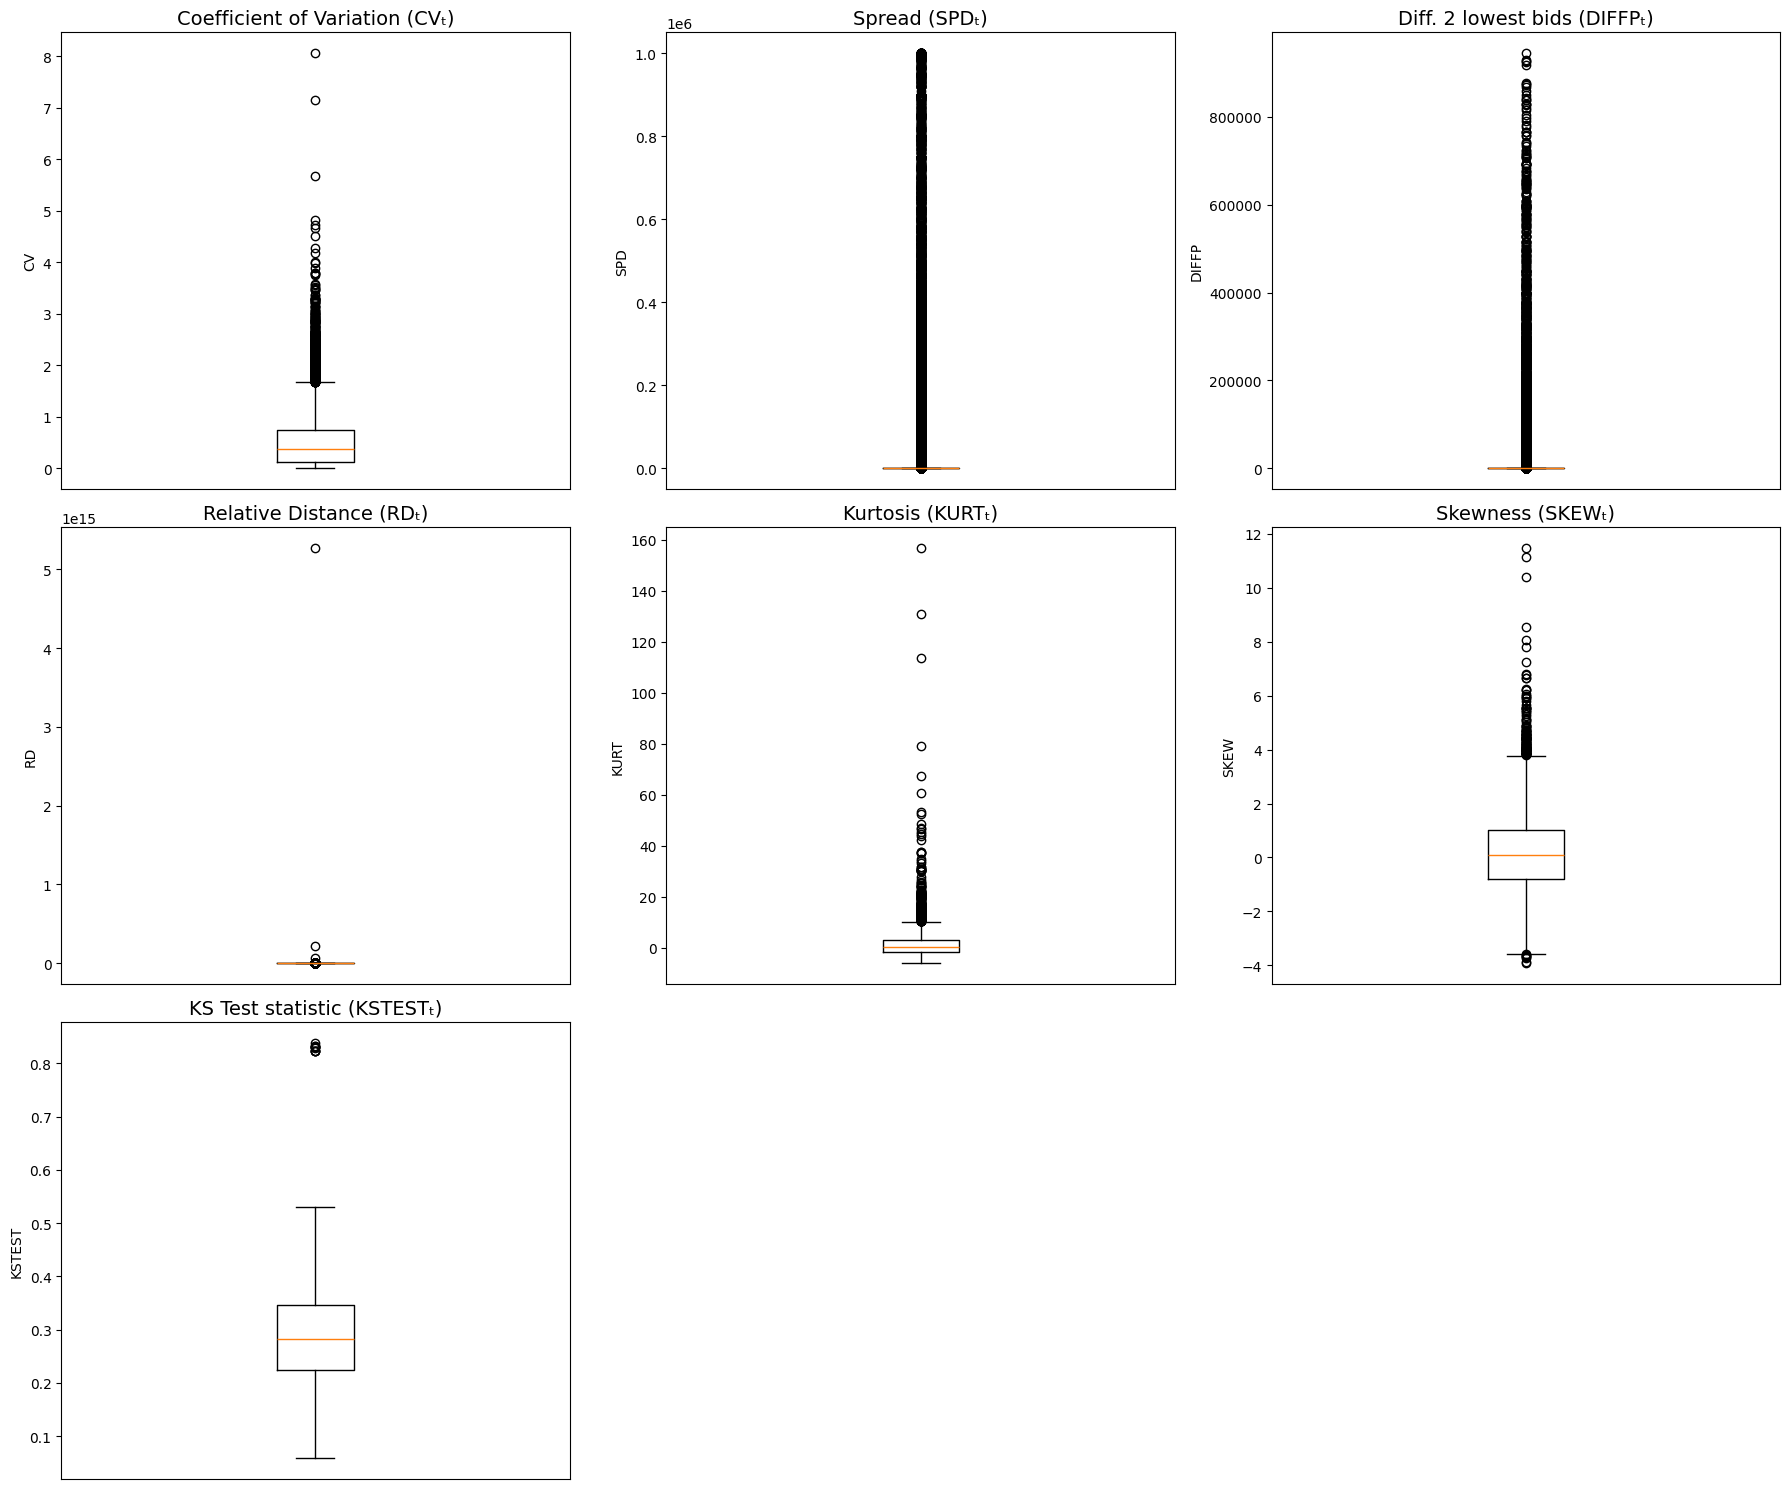

In [208]:
# Garantir que a data está bem formatada 
screens['signing_date'] = pd.to_datetime(screens['signing_date'])

# Lista das screens
colunas_screens = ['CV', 'SPD', 'DIFFP', 'RD', 'KURT', 'SKEW', 'KSTEST']

# Criar figura 3x3
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Títulos 
titles = {
    'CV': 'Coefficient of Variation (CVₜ)',
    'SPD': 'Spread (SPDₜ)',
    'DIFFP': 'Diff. 2 lowest bids (DIFFPₜ)',
    'RD': 'Relative Distance (RDₜ)',
    'KURT': 'Kurtosis (KURTₜ)',
    'SKEW': 'Skewness (SKEWₜ)',
    'KSTEST': 'KS Test statistic (KSTESTₜ)',
}

for i, screen in enumerate(colunas_screens):
    ax = axes[i]

    # tirar NaNs
    data = screens[screen].dropna()

    ax.boxplot(data, vert=True, showfliers=True)
    ax.set_title(titles.get(screen, screen), fontsize=14)
    ax.set_xticks([])                # sem label no eixo x
    ax.set_ylabel(screen)

# Remover subplots vazios
for j in range(len(colunas_screens), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Vamos remover os 10 maiores valores da coluna RD (Relative Distance) de forma a consegui visualizar melhor o comportamento desta variável:

In [209]:
# valores únicos ordenados
tops = screens['RD'].sort_values(ascending=False).unique()[:10]
screens = screens[~screens['RD'].isin(tops)].copy()

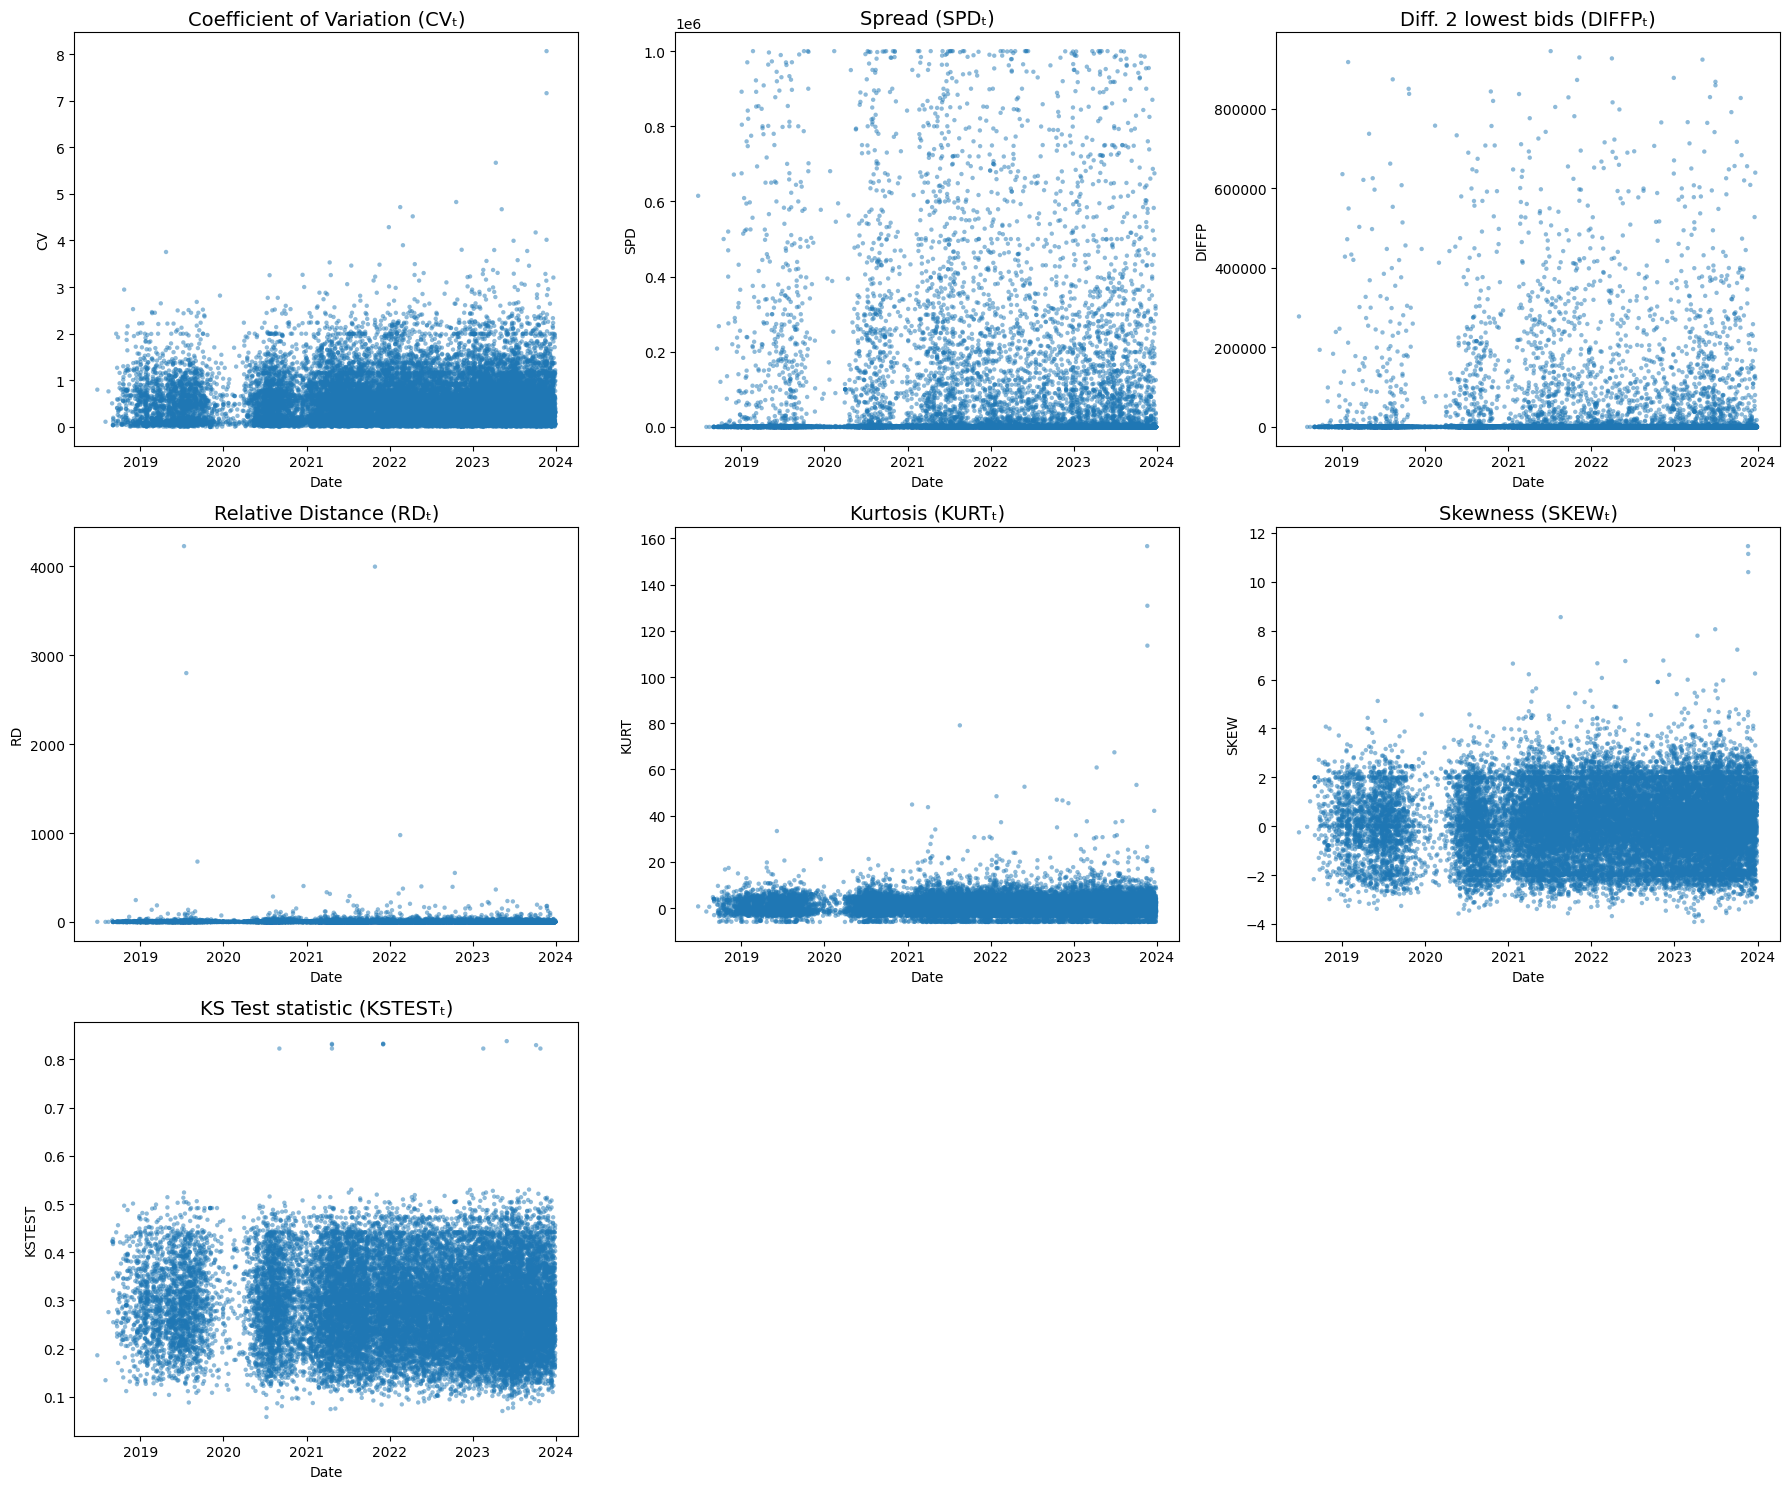

In [210]:
# Garantir que a data está bem formatada
screens['signing_date'] = pd.to_datetime(screens['signing_date'])

# Lista das screens que queres plotar
colunas_screens = ['CV', 'SPD', 'DIFFP', 'RD', 'KURT', 'SKEW', 'KSTEST']

# Criar figura 2x3 estilo paper
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Títulos para cada gráfico
titles = {
    'CV': 'Coefficient of Variation (CVₜ)',
    'SPD': 'Spread (SPDₜ)',
    'DIFFP': 'Diff. 2 lowest bids (DIFFPₜ)',
    'RD': 'Relative Distance (RDₜ)',
    'KURT': 'Kurtosis (KURTₜ)',
    'SKEW': 'Skewness (SKEWₜ)',
    'KSTEST': 'KS Test statistic (KSTESTₜ)',
}

# Plotar cada screen num subplot
for i, screen in enumerate(colunas_screens):
    ax = axes[i]

    ax.scatter(
        screens['signing_date'],
        screens[screen],
        s=10, alpha=0.5, edgecolors='none'
    )

    ax.set_title(titles.get(screen, screen), fontsize=14)
    ax.set_xlabel("Date")
    ax.set_ylabel(screen)

# Remover subplots vazios se houver menos que 9
for j in range(len(colunas_screens), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [211]:
screens

,ContractID,nifs_contestants,contracted_nif,signing_date,execution_district,execution_municipality,contract_type,cpvs,CV,SPD,DIFFP,RD,KURT,SKEW,KSTEST
1,4783825,"[500131210, 500243719, 501326456, 502332905, 5...",507011724,2018-08-01,Porto,Porto,Aquisição de serviços,79710000-4,0.111163,0.350965,0.027814,0.235109,-1.499507,-0.026671,0.134592
5,4825056,"[501561358, 503554049, 508682002, 508836590, 5...",503554049,2018-09-04,Setubal,Almada,Aquisição de bens móveis,15000000-8,0.196546,0.514925,0.002985,0.012961,-3.049761,-0.366868,0.254944
6,4827836,"[503307483, 504020285, 508604460, 509189008, 5...",504020285,2018-08-14,Leiria,Marinha Grande,Aquisição de serviços,77314000-4,0.762421,9.000000,2.000000,0.603023,0.553242,1.017670,0.275882
7,4834603,"[500221103, 500424128, 502755814, 507581547]",500221103,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.034250,0.081249,0.050044,3.163463,1.421385,-1.296284,0.246444
8,4834611,"[500424128, 502755814, 505483440, 507581547]",500424128,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.593060,14.145039,0.101310,0.039002,9.602099,2.718020,0.225003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46576,10428459,"[500701490, 500901694, 501642277, 503599093, 5...",500901694,2023-12-28,Aveiro,Espinho,Aquisição de bens móveis,35121000-8,0.095072,0.282495,0.030839,0.313414,-1.633944,-0.563764,0.238816
46577,10428460,"[500166099, 501333606, 503369489, 504870475, 5...",513718737,2023-12-22,Aveiro,Ilhavo,Empreitadas de obras públicas,45232460-4,0.119184,0.335092,0.018514,0.139065,-0.896794,0.851456,0.210851
46578,10428464,"[502117281, 502629428, 502771496, 514780355]",502629428,2023-12-27,Lisboa,Loures,Aquisição de serviços,90000000-7,0.172900,0.444219,0.061191,0.291456,3.164927,1.726690,0.346329
46586,10428567,"[503480045, 510533515]",510533515,2023-12-12,Lisboa,Lisboa,Aquisição de bens móveis,33140000-3,0.307192,0.810687,0.021505,0.051512,-5.292782,0.118826,0.296740


In [212]:
screens['signing_date'] = pd.to_datetime(screens['signing_date'])

print("Data mínima:", screens['signing_date'].min())
print("Data máxima:", screens['signing_date'].max())

Data mínima: 2018-06-26 00:00:00
Data máxima: 2023-12-30 00:00:00


### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Standardization**</span>

In [213]:
# Selecionar apenas as screens:
features = ['CV', 'SPD', 'DIFFP', 'RD', 'KURT', 'SKEW','KSTEST']
df = screens[features].copy()

Vamos Standardizar com o StandardScaler (cada feature com média 0 e variância 1):

In [214]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [215]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled

,CV,SPD,DIFFP,RD,KURT,SKEW,KSTEST
1,-0.802198,-0.306868,-0.198290,-0.067310,-0.618084,-0.102262,-1.803546
5,-0.634441,-0.306867,-0.198291,-0.072351,-1.001458,-0.349619,-0.383166
6,0.477366,-0.306808,-0.198262,-0.058962,-0.110444,0.657079,-0.136065
7,-0.953313,-0.306870,-0.198290,-0.000862,0.104246,-1.025399,-0.483479
8,0.144614,-0.306772,-0.198289,-0.071760,2.127317,1.893405,-0.736525
...,...,...,...,...,...,...,...
46576,-0.833812,-0.306869,-0.198290,-0.065533,-0.651330,-0.492782,-0.573512
46577,-0.786437,-0.306868,-0.198291,-0.069489,-0.469034,0.536225,-0.903549
46578,-0.680900,-0.306868,-0.198290,-0.066031,0.535420,1.172608,0.695347
46586,-0.417048,-0.306865,-0.198291,-0.071476,-1.556152,0.003530,0.110105


In [216]:
screens.to_csv("screens.csv", index=False) 
df_scaled.to_csv("screens_scaled.csv", index=False) 